In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# Data preparation

In [2]:
df_students = pd.read_csv('../tables_creation/final_tables/students.csv', dtype={'KATOTTG_2023': str, 'EDRPOU_school': str})
df_students.columns

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/1080893059.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_students = pd.read_csv('../tables_creation/final_tables/students.csv', dtype={'KATOTTG_2023': str, 'EDRPOU_school': str})


Index(['outid', 'birth', 'sextypename', 'classprofilename', 'regtypename',
       'classlangname', 'KATOTTG_2023', 'EDRPOU_school', 'year', 'status'],
      dtype='object')

In [3]:
df_students = df_students[['outid', 'birth', 'sextypename', 'regtypename', 'KATOTTG_2023', 'year', 'EDRPOU_school', 'status']]
df_students

,outid,birth,sextypename,regtypename,KATOTTG_2023,year,EDRPOU_school,status
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,Male,A graduate of an Ukrainian school of the curre...,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,Female,A graduate of an Ukrainian school of the curre...,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...
2,30de395e-7a74-452a-8370-6856d240fbfb,1999,Male,A graduate of an Ukrainian school of the curre...,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,1999,Female,A graduate of an Ukrainian school of the curre...,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,1999,Male,A graduate of an Ukrainian school of the curre...,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...
...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,2003,Male,A graduate of previous years,UA59020070010054283,2023,NaN,A graduate of previous years
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,1996,Female,A graduate of previous years,UA32100010010059200,2023,NaN,A graduate of previous years
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,2004,Female,A graduate of previous years,UA56080170010061049,2023,NaN,A graduate of previous years
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,2005,Female,A graduate of previous years,UA51100270010320268,2023,NaN,A graduate of previous years


In [4]:
df_students.status.value_counts()

status
A graduate of an Ukrainian school of the current year                1544229
A graduate of a vocational pre-higher education institution           580029
A graduate of previous years                                          329227
A student of a higher/vocational pre-higher education institution      31956
A student of a higher education institution                             3748
The institution of punishment                                            437
A graduate of a foreign school                                           426
Name: count, dtype: int64

In [5]:
len(df_students.KATOTTG_2023.unique())

18470

In [6]:
df_schools = pd.read_csv('../tables_creation/final_tables/schools_edrpou.csv', dtype={'KATOTTG_2023': str, 'EDRPOU': str})
df_schools

,KATOTTG_2023,EDRPOU,year,eotypename
0,UA05020030010063857,04601943,2023,заклад фахової передвищої освіти
1,UA05020030010063857,00419667,2022,заклад фахової передвищої освіти
2,UA05020030010063857,03065891,2018,вище професійне училище
3,UA05020030010063857,03065891,2019,вище професійне училище
4,UA05020030010063857,03065891,2020,вище професійне училище
...,...,...,...,...
82508,UA80000000001078669,26125905,2017,середня загальноосвітня школа
82509,UA80000000001078669,26125940,2020,середня загальноосвітня школа
82510,UA80000000001078669,26125940,2021,середня загальноосвітня школа
82511,UA80000000001078669,26125940,2022,середня загальноосвітня школа


In [7]:
df_schools = df_schools.rename(columns={'EDRPOU':'EDRPOU_school'})

In [8]:
df_students_schools = df_students.merge(df_schools[['EDRPOU_school', 'year', 'eotypename']], on = ['EDRPOU_school', 'year'], how = 'left')
df_students_schools

,outid,birth,sextypename,regtypename,KATOTTG_2023,year,EDRPOU_school,status,eotypename
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,Male,A graduate of an Ukrainian school of the curre...,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,колегіум
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,Female,A graduate of an Ukrainian school of the curre...,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,середня загальноосвітня школа
2,30de395e-7a74-452a-8370-6856d240fbfb,1999,Male,A graduate of an Ukrainian school of the curre...,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,спеціалізована школа
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,1999,Female,A graduate of an Ukrainian school of the curre...,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,середня загальноосвітня школа
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,1999,Male,A graduate of an Ukrainian school of the curre...,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,спеціалізована школа
...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,2003,Male,A graduate of previous years,UA59020070010054283,2023,NaN,A graduate of previous years,NaN
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,1996,Female,A graduate of previous years,UA32100010010059200,2023,NaN,A graduate of previous years,NaN
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,2004,Female,A graduate of previous years,UA56080170010061049,2023,NaN,A graduate of previous years,NaN
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,2005,Female,A graduate of previous years,UA51100270010320268,2023,NaN,A graduate of previous years,NaN


In [9]:
pivot = pd.pivot_table(df_students_schools, index = ['eotypename'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid            \
year                                                    2016      2017   
eotypename                                                               
Пенітенціарна установа                                 377.0       NaN   
вечірня (змінна) школа                                1021.0     638.0   
вище професійне училище                                  NaN       NaN   
вище художнє професійно-технічне училище                 NaN       NaN   
вищий навчальний заклад I-II рівнів акредитації          1.0       NaN   
військовий (військово-морський, військово-спорт...       NaN       NaN   
гімназія                                             16444.0   16568.0   
загальноосвітня санаторна школа                        271.0     256.0   
заклад вищої освіти                                      NaN       NaN   
заклад професійної (професійно-технічної) освіти         NaN       NaN   
заклад фахової передвищої освіти                         NaN       NaN   
заклад фахової передвищої освіти/ліцей                   NaN       NaN   
колегіум                                              1360.0    1239.0   
колегіум/колеж                                           NaN       NaN   
коледж                                                   NaN       NaN   
ліцей                                                14500.0   14647.0   
ліцей із посиленою військово-фізичною підготовкою        NaN       NaN   
мистецький ліцей                                         NaN       NaN   
навчально-виховне об'єднання                             NaN     634.0   
навчально-виховний комплекс                          27001.0   27443.0   
навчально-реабілітаційний центр                          NaN       NaN   
науковий ліцей                                           NaN       NaN   
початкова школа                                          NaN       NaN   
професійний ліцей відповідного профілю                   NaN      13.0   
професійно-технічне училище відповідного профілю         NaN       NaN   
середня загальноосвітня школа                       121487.0  112372.0   
середня загальноосвітня школа-інтернат                1544.0    1447.0   
спеціальна загальноосвітня школа                        69.0     168.0   
спеціальна загальноосвітня школа-інтернат              241.0     197.0   
спеціальна школа                                         NaN       NaN   
спеціалізована школа                                 15286.0   15818.0   
спеціалізована школа-інтернат                         1508.0    1343.0   
спортивний ліцей                                         NaN       NaN   
центр професійно-технічної освіти                        NaN       NaN   
центр професійної освіти                                 NaN       NaN   
центр підготовки і перепідготовки робітничих ка...       NaN       NaN   
школа соціальної реабілітації                            4.0       2.0   

                                                                        \
year                                                    2018      2019   
eotypename                                                               
Пенітенціарна установа                                   NaN       NaN   
вечірня (змінна) школа                                 634.0     482.0   
вище професійне училище                              12865.0   14613.0   
вище художнє професійно-технічне училище               574.0     692.0   
вищий навчальний заклад I-II рівнів акредитації      75218.0       NaN   
військовий (військово-морський, військово-спорт...       NaN       NaN   
гімназія                                             16010.0   15212.0   
загальноосвітня санаторна школа                        315.0     327.0   
заклад вищої освіти                                    305.0   83242.0   
заклад професійної (професійно-технічної) освіти         NaN       NaN   
заклад фахової передвищої освіти                       368.0     399.0   
заклад фахової передвищої освіти/ліцей                 121

In [10]:
df_reg = df_students[df_students.KATOTTG_2023.str.startswith('UA')]
df_reg['region'] =  df_reg['KATOTTG_2023'].str[:4]
df_reg['raion'] =  df_reg['KATOTTG_2023'].str[:6]
df_reg['hromada'] =  df_reg['KATOTTG_2023'].str[:9]
df_reg['naspunkt'] =  df_reg['KATOTTG_2023'].str[:12]
df_reg

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/238638734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['region'] =  df_reg['KATOTTG_2023'].str[:4]
/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/238638734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['raion'] =  df_reg['KATOTTG_2023'].str[:6]
/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/238638734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,outid,birth,sextypename,regtypename,KATOTTG_2023,year,EDRPOU_school,status,region,raion,hromada,naspunkt
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,Male,A graduate of an Ukrainian school of the curre...,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,UA23,UA2308,UA2308027,UA2308027001
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,Female,A graduate of an Ukrainian school of the curre...,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,UA68,UA6804,UA6804021,UA6804021001
2,30de395e-7a74-452a-8370-6856d240fbfb,1999,Male,A graduate of an Ukrainian school of the curre...,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,UA73,UA7306,UA7306061,UA7306061001
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,1999,Female,A graduate of an Ukrainian school of the curre...,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,UA14,UA1412,UA1412003,UA1412003001
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,1999,Male,A graduate of an Ukrainian school of the curre...,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,UA61,UA6104,UA6104049,UA6104049001
...,...,...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,2003,Male,A graduate of previous years,UA59020070010054283,2023,NaN,A graduate of previous years,UA59,UA5902,UA5902007,UA5902007001
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,1996,Female,A graduate of previous years,UA32100010010059200,2023,NaN,A graduate of previous years,UA32,UA3210,UA3210001,UA3210001001
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,2004,Female,A graduate of previous years,UA56080170010061049,2023,NaN,A graduate of previous years,UA56,UA5608,UA5608017,UA5608017001
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,2005,Female,A graduate of previous years,UA51100270010320268,2023,NaN,A graduate of previous years,UA51,UA5110,UA5110027,UA5110027001


In [11]:
df_reg.EDRPOU_school

0          26373098
1          25880114
2          21431046
3          25705061
4          14040173
             ...   
2490047         NaN
2490048         NaN
2490049         NaN
2490050         NaN
2490051         NaN
Name: EDRPOU_school, Length: 2486358, dtype: object

In [12]:
len(df_reg.region.unique())

25

In [13]:
len(df_reg.raion.unique())

120

In [14]:
len(df_reg.hromada.unique())

1439

In [15]:
df_location = pd.read_csv('../tables_creation/final_tables/locations_base.csv', dtype={'KOATUU_2020': str, 'KATOTTG_2023': str})
df_location = df_location.drop_duplicates(subset=['KATOTTG_2023'], keep='first')
df_location.head()

,KATOTTG_2023,KOATUU_2020,category,ukrainian_name,english_name
0,UA01000000000013043,0100000000,region,Автономна Республіка Крим,Avtonomna Respublika Krym
1,UA01020000000022387,0120400000,district,Бахчисарайський,Bakhchysaraiskyi
2,UA01020010000048857,8536990200,hromada,Андріївська,NaN
3,UA01020010010075540,8536990201,village,Андріївка,NaN
4,UA01020010020030666,8536990203,settlement,Сонячний,NaN


In [16]:
region_df=df_location[df_location.category.isin(['region', 'capital'])][['KATOTTG_2023', 'english_name']]
region_df['KATOTTG_2023_region'] = region_df['KATOTTG_2023'].str[:4]
region_df.drop(columns='KATOTTG_2023', inplace=True)
region_df.reset_index(inplace=True, drop=True)
region_df

,english_name,KATOTTG_2023_region
0,Avtonomna Respublika Krym,UA01
1,Vinnytska,UA05
2,Volynska,UA07
3,Dnipropetrovska,UA12
4,Donetska,UA14
5,Zhytomyrskа,UA18
6,Zakarpatska,UA21
7,Zaporizka,UA23
8,Ivano-Frankivska,UA26
9,Kyivska,UA32


In [17]:
abroad_df=df_location[(df_location.category=='abroad')&(df_location.KATOTTG_2023.str[4:6]=='00')][['KATOTTG_2023', 'english_name']]
abroad_df['KATOTTG_2023_region'] = abroad_df['KATOTTG_2023'].str[:4]
abroad_df.drop(columns='KATOTTG_2023', inplace=True)
abroad_df.reset_index(inplace=True, drop=True)
abroad_df

,english_name,KATOTTG_2023_region
0,Ireland,OC01
1,Spain,OC02
2,Italy,OC03
3,Azerbaijan,OC04
4,Austia,OC05
5,Belgium,OC06
6,Bulgaria,OC07
7,United Kingdom,OC08
8,Greece,OC09
9,Georgia,OC10


In [18]:
df_students_region = df_students.merge(df_location[['KATOTTG_2023', 'category']], on = ['KATOTTG_2023'], how = 'left')
df_students_region['KATOTTG_2023_region']=df_students_region['KATOTTG_2023'].str[:4]
df_students_region

,outid,birth,sextypename,regtypename,KATOTTG_2023,year,EDRPOU_school,status,category,KATOTTG_2023_region
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,Male,A graduate of an Ukrainian school of the curre...,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,village,UA23
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,Female,A graduate of an Ukrainian school of the curre...,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,city,UA68
2,30de395e-7a74-452a-8370-6856d240fbfb,1999,Male,A graduate of an Ukrainian school of the curre...,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,city,UA73
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,1999,Female,A graduate of an Ukrainian school of the curre...,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,city,UA14
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,1999,Male,A graduate of an Ukrainian school of the curre...,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,city,UA61
...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,2003,Male,A graduate of previous years,UA59020070010054283,2023,NaN,A graduate of previous years,city,UA59
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,1996,Female,A graduate of previous years,UA32100010010059200,2023,NaN,A graduate of previous years,city,UA32
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,2004,Female,A graduate of previous years,UA56080170010061049,2023,NaN,A graduate of previous years,city,UA56
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,2005,Female,A graduate of previous years,UA51100270010320268,2023,NaN,A graduate of previous years,districts in cities,UA51


In [19]:
df_students_region = df_students_region.merge(region_df, on = ['KATOTTG_2023_region'], how = 'left')
df_students_region 

,outid,birth,sextypename,regtypename,KATOTTG_2023,year,EDRPOU_school,status,category,KATOTTG_2023_region,english_name
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,Male,A graduate of an Ukrainian school of the curre...,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,village,UA23,Zaporizka
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,Female,A graduate of an Ukrainian school of the curre...,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,city,UA68,Khmelnytska
2,30de395e-7a74-452a-8370-6856d240fbfb,1999,Male,A graduate of an Ukrainian school of the curre...,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,city,UA73,Chernivetska
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,1999,Female,A graduate of an Ukrainian school of the curre...,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,city,UA14,Donetska
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,1999,Male,A graduate of an Ukrainian school of the curre...,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,city,UA61,Ternopilska
...,...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,2003,Male,A graduate of previous years,UA59020070010054283,2023,NaN,A graduate of previous years,city,UA59,Sumska
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,1996,Female,A graduate of previous years,UA32100010010059200,2023,NaN,A graduate of previous years,city,UA32,Kyivska
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,2004,Female,A graduate of previous years,UA56080170010061049,2023,NaN,A graduate of previous years,city,UA56,Rivnenska
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,2005,Female,A graduate of previous years,UA51100270010320268,2023,NaN,A graduate of previous years,districts in cities,UA51,Odeska


In [20]:
df_students_region = df_students_region.merge(abroad_df, on = ['KATOTTG_2023_region'], how = 'left')
df_students_region 

,outid,birth,sextypename,regtypename,KATOTTG_2023,year,EDRPOU_school,status,category,KATOTTG_2023_region,english_name_x,english_name_y
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,Male,A graduate of an Ukrainian school of the curre...,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,village,UA23,Zaporizka,NaN
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,Female,A graduate of an Ukrainian school of the curre...,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,city,UA68,Khmelnytska,NaN
2,30de395e-7a74-452a-8370-6856d240fbfb,1999,Male,A graduate of an Ukrainian school of the curre...,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,city,UA73,Chernivetska,NaN
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,1999,Female,A graduate of an Ukrainian school of the curre...,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,city,UA14,Donetska,NaN
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,1999,Male,A graduate of an Ukrainian school of the curre...,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,city,UA61,Ternopilska,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,2003,Male,A graduate of previous years,UA59020070010054283,2023,NaN,A graduate of previous years,city,UA59,Sumska,NaN
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,1996,Female,A graduate of previous years,UA32100010010059200,2023,NaN,A graduate of previous years,city,UA32,Kyivska,NaN
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,2004,Female,A graduate of previous years,UA56080170010061049,2023,NaN,A graduate of previous years,city,UA56,Rivnenska,NaN
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,2005,Female,A graduate of previous years,UA51100270010320268,2023,NaN,A graduate of previous years,districts in cities,UA51,Odeska,NaN


In [21]:
df_students_region.loc[df_students_region.english_name_x.isna(), 'english_name_x'] =df_students_region.english_name_y

In [22]:
df_students_region.drop(columns='english_name_y', inplace=True)
df_students_region.rename(columns={'english_name_x':'region_name'}, inplace=True)
df_students_region

,outid,birth,sextypename,regtypename,KATOTTG_2023,year,EDRPOU_school,status,category,KATOTTG_2023_region,region_name
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,Male,A graduate of an Ukrainian school of the curre...,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,village,UA23,Zaporizka
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,Female,A graduate of an Ukrainian school of the curre...,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,city,UA68,Khmelnytska
2,30de395e-7a74-452a-8370-6856d240fbfb,1999,Male,A graduate of an Ukrainian school of the curre...,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,city,UA73,Chernivetska
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,1999,Female,A graduate of an Ukrainian school of the curre...,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,city,UA14,Donetska
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,1999,Male,A graduate of an Ukrainian school of the curre...,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,city,UA61,Ternopilska
...,...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,2003,Male,A graduate of previous years,UA59020070010054283,2023,NaN,A graduate of previous years,city,UA59,Sumska
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,1996,Female,A graduate of previous years,UA32100010010059200,2023,NaN,A graduate of previous years,city,UA32,Kyivska
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,2004,Female,A graduate of previous years,UA56080170010061049,2023,NaN,A graduate of previous years,city,UA56,Rivnenska
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,2005,Female,A graduate of previous years,UA51100270010320268,2023,NaN,A graduate of previous years,districts in cities,UA51,Odeska


In [23]:
df_students_region[df_students_region.region_name.isna()]

,outid,birth,sextypename,regtypename,KATOTTG_2023,year,EDRPOU_school,status,category,KATOTTG_2023_region,region_name


In [24]:
df_students_region.region_name.unique()

array(['Zaporizka', 'Khmelnytska', 'Chernivetska', 'Donetska',
       'Ternopilska', 'Kirovohradska', 'Odeska', 'Dnipropetrovska',
       'Lvivska', 'Ivano-Frankivska', 'Kharkivska', 'Cherkaska',
       'Volynska', 'Poltavska', 'Rivnenska', 'Vinnytska', 'Chernihivska',
       'Kyivska', 'Zakarpatska', 'Kyiv', 'Zhytomyrskа', 'Mykolaivska',
       'Khersonska', 'Luhanska', 'Sumska', 'Poland', 'France', 'Germany',
       'Estonia', 'Norway', 'Slovakia', 'Austia', 'United Kingdom',
       'Ireland', 'Bulgaria', 'Moldova', 'Portugal', 'Azerbaijan',
       'Hungary', 'Italy', 'Turkey', 'Czechia', 'Belgium', 'Spain',
       'Canada', 'Croatia', 'Latvia', 'Romania', 'Lithuania', 'Georgia',
       'United States of America', 'Finland', 'Sweden', 'Luxembourg',
       'Netherlands', 'Denmark', 'Switzerland'], dtype=object)

In [25]:
df_students_region['abroad'] = df_students_region['KATOTTG_2023_region'].map(lambda x: 1 if x[:2] == 'OC' else 0)
df_students_region.drop(['KATOTTG_2023', 'KATOTTG_2023_region'], axis = 1, inplace=True)
df_students_region

,outid,birth,sextypename,regtypename,year,EDRPOU_school,status,category,region_name,abroad
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,Male,A graduate of an Ukrainian school of the curre...,2016,26373098,A graduate of an Ukrainian school of the curre...,village,Zaporizka,0
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,Female,A graduate of an Ukrainian school of the curre...,2016,25880114,A graduate of an Ukrainian school of the curre...,city,Khmelnytska,0
2,30de395e-7a74-452a-8370-6856d240fbfb,1999,Male,A graduate of an Ukrainian school of the curre...,2016,21431046,A graduate of an Ukrainian school of the curre...,city,Chernivetska,0
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,1999,Female,A graduate of an Ukrainian school of the curre...,2016,25705061,A graduate of an Ukrainian school of the curre...,city,Donetska,0
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,1999,Male,A graduate of an Ukrainian school of the curre...,2016,14040173,A graduate of an Ukrainian school of the curre...,city,Ternopilska,0
...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,2003,Male,A graduate of previous years,2023,NaN,A graduate of previous years,city,Sumska,0
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,1996,Female,A graduate of previous years,2023,NaN,A graduate of previous years,city,Kyivska,0
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,2004,Female,A graduate of previous years,2023,NaN,A graduate of previous years,city,Rivnenska,0
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,2005,Female,A graduate of previous years,2023,NaN,A graduate of previous years,districts in cities,Odeska,0


# Block1. Abstract. Total numbers

## All participants

Total number of participants 2.49M

In [26]:
df_students_region.shape

(2490052, 10)

Total number of participants impacted by war - 523K

In [27]:
df_students_region[df_students_region.year.isin([2022, 2023])].shape

(523039, 10)

Percentage drop in registration - 40%

In [28]:
round(df_students_region[df_students_region.year == 2022].shape[0]/(df_students_region[df_students_region.year == 2021].shape[0])*100,1)

60.1

In [29]:
df_students_region.year.value_counts()

year
2021    389323
2020    379299
2019    353813
2018    335687
2023    288935
2016    268002
2017    240889
2022    234104
Name: count, dtype: int64

In [30]:
df_students_region.columns

Index(['outid', 'birth', 'sextypename', 'regtypename', 'year', 'EDRPOU_school',
       'status', 'category', 'region_name', 'abroad'],
      dtype='object')

In [31]:
len(df_students_region[df_students_region.abroad==0].region_name.unique())

25

In [32]:
pivot = pd.pivot_table(df_students_region, index = ['status'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid            \
year                                                    2016      2017   
status                                                                   
A graduate of a foreign school                          59.0      62.0   
A graduate of a vocational pre-higher education...       NaN       NaN   
A graduate of an Ukrainian school of the curren...  200736.0  192772.0   
A graduate of previous years                         48505.0   34424.0   
A student of a higher education institution              NaN       NaN   
A student of a higher/vocational pre-higher edu...   18325.0   13631.0   
The institution of punishment                          377.0       NaN   

                                                                        \
year                                                    2018      2019   
status                                                                   
A graduate of a foreign school                          32.0      33.0   
A graduate of a vocational pre-higher education...  119466.0  132448.0   
A graduate of an Ukrainian school of the curren...  185342.0  187632.0   
A graduate of previous years                         29307.0   33103.0   
A student of a higher education institution           1540.0     597.0   
A student of a higher/vocational pre-higher edu...       NaN       NaN   
The institution of punishment                            NaN       NaN   

                                                                        \
year                                                    2020      2021   
status                                                                   
A graduate of a foreign school                          45.0      36.0   
A graduate of a vocational pre-higher education...  125465.0  118373.0   
A graduate of an Ukrainian school of the curren...  211157.0  219608.0   
A graduate of previous years                         42419.0   51009.0   
A student of a higher education institution            213.0     297.0   
A student of a higher/vocational pre-higher edu...       NaN       NaN   
The institution of punishment                            NaN       NaN   

                                                                        
year                                                    2022      2023  
status                                                                  
A graduate of a foreign school                          89.0      70.0  
A graduate of a vocational pre-higher education...   30521.0   53756.0  
A graduate of an Ukrainian school of the curren...  166238.0  180744.0  
A graduate of previous years                         36129.0   54331.0  
A student of a higher education institution           1101.0       NaN  
A student of a higher/vocational pre-higher edu...       NaN       NaN  
The institution of punishment                           26.0      34.0

In [33]:
pivot = pd.pivot_table(df_students_region, index = ['regtypename'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid            \
year                                                    2016      2017   
regtypename                                                              
A graduate of a foreign school                          62.0      62.0   
A graduate of a vocational pre-higher education...       NaN       NaN   
A graduate of an Ukrainian school of the curren...  200726.0  192785.0   
A graduate of previous years                         48506.0   34424.0   
A student of a higher education institution              NaN       NaN   
A student of a higher/vocational pre-higher edu...   18324.0   13618.0   
The institution of punishment                          384.0       NaN   

                                                                        \
year                                                    2018      2019   
regtypename                                                              
A graduate of a foreign school                          32.0      33.0   
A graduate of a vocational pre-higher education...   43448.0   48669.0   
A graduate of an Ukrainian school of the curren...  185373.0  187659.0   
A graduate of previous years                         29307.0   33103.0   
A student of a higher education institution          77527.0   84349.0   
A student of a higher/vocational pre-higher edu...       NaN       NaN   
The institution of punishment                            NaN       NaN   

                                                                        \
year                                                    2020      2021   
regtypename                                                              
A graduate of a foreign school                          45.0      36.0   
A graduate of a vocational pre-higher education...   47108.0   48954.0   
A graduate of an Ukrainian school of the curren...  211195.0  219640.0   
A graduate of previous years                         42419.0   51009.0   
A student of a higher education institution          78532.0   69684.0   
A student of a higher/vocational pre-higher edu...       NaN       NaN   
The institution of punishment                            NaN       NaN   

                                                                        
year                                                    2022      2023  
regtypename                                                             
A graduate of a foreign school                          89.0       NaN  
A graduate of a vocational pre-higher education...    6815.0       NaN  
A graduate of an Ukrainian school of the curren...  166252.0  234570.0  
A graduate of previous years                         36129.0   54331.0  
A student of a higher education institution              NaN       NaN  
A student of a higher/vocational pre-higher edu...   24793.0       NaN  
The institution of punishment                           26.0      34.0

In [34]:
pivot = pd.pivot_table(df_students_region, index = ['status'], columns = ['year'], values=['outid'], aggfunc='count')
print(pivot.to_latex(float_format="{:,.0f}".format))
pivot

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
status &  &  &  &  &  &  &  &  \\
\midrule
A graduate of a foreign school & 59 & 62 & 32 & 33 & 45 & 36 & 89 & 70 \\
A graduate of a vocational pre-higher education institution & NaN & NaN & 119,466 & 132,448 & 125,465 & 118,373 & 30,521 & 53,756 \\
A graduate of an Ukrainian school of the current year & 200,736 & 192,772 & 185,342 & 187,632 & 211,157 & 219,608 & 166,238 & 180,744 \\
A graduate of previous years & 48,505 & 34,424 & 29,307 & 33,103 & 42,419 & 51,009 & 36,129 & 54,331 \\
A student of a higher education institution & NaN & NaN & 1,540 & 597 & 213 & 297 & 1,101 & NaN \\
A student of a higher/vocational pre-higher education institution & 18,325 & 13,631 & NaN & NaN & NaN & NaN & NaN & NaN \\
The institution of punishment & 377 & NaN & NaN & NaN & NaN & NaN & 26 & 34 \\
\bottomrule
\end{tabular}



outid            \
year                                                    2016      2017   
status                                                                   
A graduate of a foreign school                          59.0      62.0   
A graduate of a vocational pre-higher education...       NaN       NaN   
A graduate of an Ukrainian school of the curren...  200736.0  192772.0   
A graduate of previous years                         48505.0   34424.0   
A student of a higher education institution              NaN       NaN   
A student of a higher/vocational pre-higher edu...   18325.0   13631.0   
The institution of punishment                          377.0       NaN   

                                                                        \
year                                                    2018      2019   
status                                                                   
A graduate of a foreign school                          32.0      33.0   
A graduate of a vocational pre-higher education...  119466.0  132448.0   
A graduate of an Ukrainian school of the curren...  185342.0  187632.0   
A graduate of previous years                         29307.0   33103.0   
A student of a higher education institution           1540.0     597.0   
A student of a higher/vocational pre-higher edu...       NaN       NaN   
The institution of punishment                            NaN       NaN   

                                                                        \
year                                                    2020      2021   
status                                                                   
A graduate of a foreign school                          45.0      36.0   
A graduate of a vocational pre-higher education...  125465.0  118373.0   
A graduate of an Ukrainian school of the curren...  211157.0  219608.0   
A graduate of previous years                         42419.0   51009.0   
A student of a higher education institution            213.0     297.0   
A student of a higher/vocational pre-higher edu...       NaN       NaN   
The institution of punishment                            NaN       NaN   

                                                                        
year                                                    2022      2023  
status                                                                  
A graduate of a foreign school                          89.0      70.0  
A graduate of a vocational pre-higher education...   30521.0   53756.0  
A graduate of an Ukrainian school of the curren...  166238.0  180744.0  
A graduate of previous years                         36129.0   54331.0  
A student of a higher education institution           1101.0       NaN  
A student of a higher/vocational pre-higher edu...       NaN       NaN  
The institution of punishment                           26.0      34.0

In [35]:
pivot = pd.pivot_table(df_students_region, index='category', columns=['year'], values='outid', aggfunc='count')
print(pivot.to_latex(float_format="{:,.0f}".format))
pivot

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
category &  &  &  &  &  &  &  &  \\
\midrule
abroad & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 3,694 \\
city & 79,382 & 75,328 & 128,282 & 136,204 & 143,390 & 146,191 & 85,391 & 113,320 \\
districts in cities & 79,806 & 76,950 & 117,117 & 126,803 & 134,833 & 137,999 & 85,432 & 109,226 \\
settlement & 1,774 & 1,217 & 1,282 & 1,260 & 1,502 & 1,457 & 591 & 518 \\
urban village & 21,913 & 21,385 & 26,873 & 27,765 & 30,312 & 31,515 & 18,778 & 20,429 \\
village & 85,127 & 66,009 & 62,133 & 61,781 & 69,262 & 72,161 & 43,912 & 41,748 \\
\bottomrule
\end{tabular}



year,2016,2017,2018,2019,2020,2021,2022,2023
category,,,,,,,,
abroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3694.0
city,79382.0,75328.0,128282.0,136204.0,143390.0,146191.0,85391.0,113320.0
districts in cities,79806.0,76950.0,117117.0,126803.0,134833.0,137999.0,85432.0,109226.0
settlement,1774.0,1217.0,1282.0,1260.0,1502.0,1457.0,591.0,518.0
urban village,21913.0,21385.0,26873.0,27765.0,30312.0,31515.0,18778.0,20429.0
village,85127.0,66009.0,62133.0,61781.0,69262.0,72161.0,43912.0,41748.0


In [36]:
pivot = pd.pivot_table(df_students_region, index='category', columns=['year'], values='outid', aggfunc='count')
total = [len(df_students_region[df_students_region['year']==year].outid.unique()) for year in range(2016, 2024)]
result = pivot.div(total)
print(result.to_latex(float_format="{:.2f}".format))
result

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
category &  &  &  &  &  &  &  &  \\
\midrule
abroad & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 0.01 \\
city & 0.30 & 0.31 & 0.38 & 0.38 & 0.38 & 0.38 & 0.36 & 0.39 \\
districts in cities & 0.30 & 0.32 & 0.35 & 0.36 & 0.36 & 0.35 & 0.36 & 0.38 \\
settlement & 0.01 & 0.01 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
urban village & 0.08 & 0.09 & 0.08 & 0.08 & 0.08 & 0.08 & 0.08 & 0.07 \\
village & 0.32 & 0.27 & 0.19 & 0.17 & 0.18 & 0.19 & 0.19 & 0.14 \\
\bottomrule
\end{tabular}



year,2016,2017,2018,2019,2020,2021,2022,2023
category,,,,,,,,
abroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012785
city,0.296199,0.312708,0.382148,0.384960,0.378039,0.375501,0.364757,0.392199
districts in cities,0.297781,0.319442,0.348888,0.358390,0.355479,0.354459,0.364932,0.378030
settlement,0.006619,0.005052,0.003819,0.003561,0.003960,0.003742,0.002525,0.001793
urban village,0.081764,0.088775,0.080054,0.078474,0.079916,0.080948,0.080212,0.070704
village,0.317636,0.274022,0.185092,0.174615,0.182605,0.185350,0.187575,0.144489


In [37]:
pivot = pd.pivot_table(df_students_region, index='sextypename', columns=['year'], values='outid', aggfunc='count')
print(pivot.to_latex(float_format="{:,.0f}".format))
pivot

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
sextypename &  &  &  &  &  &  &  &  \\
\midrule
Female & 141626 & 127637 & 168582 & 175647 & 187488 & 193073 & 122311 & 148941 \\
Male & 126376 & 113252 & 167105 & 178166 & 191811 & 196250 & 111793 & 139994 \\
\bottomrule
\end{tabular}



year,2016,2017,2018,2019,2020,2021,2022,2023
sextypename,,,,,,,,
Female,141626,127637,168582,175647,187488,193073,122311,148941
Male,126376,113252,167105,178166,191811,196250,111793,139994


In [38]:
pivot = pd.pivot_table(df_students_region, index='sextypename', columns=['year'], values='outid', aggfunc='count')
total = [len(df_students_region[df_students_region['year']==year].outid.unique()) for year in range(2016, 2024)]
result = pivot.div(total)
print(result.to_latex(float_format="{:.2f}".format))
result

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
sextypename &  &  &  &  &  &  &  &  \\
\midrule
Female & 0.53 & 0.53 & 0.50 & 0.50 & 0.49 & 0.50 & 0.52 & 0.52 \\
Male & 0.47 & 0.47 & 0.50 & 0.50 & 0.51 & 0.50 & 0.48 & 0.48 \\
\bottomrule
\end{tabular}



year,2016,2017,2018,2019,2020,2021,2022,2023
sextypename,,,,,,,,
Female,0.528451,0.529858,0.5022,0.49644,0.494301,0.49592,0.522464,0.515483
Male,0.471549,0.470142,0.4978,0.50356,0.505699,0.50408,0.477536,0.484517


In [39]:
pivot = pd.pivot_table(df_students_region, index = ['region_name'], columns = ['year'], values=['outid'], aggfunc='count')
print(pivot.to_latex(float_format="{:,.0f}".format))
pivot

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
region_name &  &  &  &  &  &  &  &  \\
\midrule
Austia & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 104 \\
Azerbaijan & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 21 \\
Belgium & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 71 \\
Bulgaria & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 84 \\
Canada & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 83 \\
Cherkaska & 8,078 & 7,234 & 8,733 & 9,099 & 11,216 & 10,853 & 6,967 & 8,962 \\
Chernihivska & 7,557 & 6,777 & 8,533 & 8,471 & 9,047 & 8,978 & 6,054 & 7,155 \\
Chernivetska & 6,804 & 6,095 & 8,981 & 8,980 & 9,457 & 9,603 & 5,153 & 6,869 \\
Croatia & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 14 \\
Czechia & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 204 \\
Denmark & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 26 \\
Dnipropetrovska & 21,725 & 19,207 & 24,800 & 29,263 & 31,833 & 32,479 & 20,859 & 23,610 \\
Donetska & 11,427 & 10

outid                                      \
year                         2016     2017     2018     2019     2020   
region_name                                                             
Austia                        NaN      NaN      NaN      NaN      NaN   
Azerbaijan                    NaN      NaN      NaN      NaN      NaN   
Belgium                       NaN      NaN      NaN      NaN      NaN   
Bulgaria                      NaN      NaN      NaN      NaN      NaN   
Canada                        NaN      NaN      NaN      NaN      NaN   
Cherkaska                  8078.0   7234.0   8733.0   9099.0  11216.0   
Chernihivska               7557.0   6777.0   8533.0   8471.0   9047.0   
Chernivetska               6804.0   6095.0   8981.0   8980.0   9457.0   
Croatia                       NaN      NaN      NaN      NaN      NaN   
Czechia                       NaN      NaN      NaN      NaN      NaN   
Denmark                       NaN      NaN      NaN      NaN      NaN   
Dnipropetrovska           21725.0  19207.0  24800.0  29263.0  31833.0   
Donetska                  11427.0  10238.0  14365.0  15098.0  16235.0   
Estonia                       NaN      NaN      NaN      NaN      NaN   
Finland                       NaN      NaN      NaN      NaN      NaN   
France                        NaN      NaN      NaN      NaN      NaN   
Georgia                       NaN      NaN      NaN      NaN      NaN   
Germany                       NaN      NaN      NaN      NaN      NaN   
Hungary                       NaN      NaN      NaN      NaN      NaN   
Ireland                       NaN      NaN      NaN      NaN      NaN   
Italy                         NaN      NaN      NaN      NaN      NaN   
Ivano-Frankivska           9381.0   8396.0  12948.0  13556.0  14770.0   
Kharkivska                16901.0  15329.0  21251.0  21644.0  23706.0   
Khersonska                 8190.0   7032.0   9190.0   9781.0  10248.0   
Khmelnytska                8896.0   7918.0  11756.0  11641.0  11917.0   
Kirovohradska              6652.0   5797.0   7889.0   8026.0   8779.0   
Kyiv                      20086.0  19604.0  28432.0  30202.0  32407.0   
Kyivska                   12385.0  10651.0  12972.0  13543.0  15331.0   
Latvia                        NaN      NaN      NaN      NaN      NaN   
Lithuania                     NaN      NaN      NaN      NaN      NaN   
Luhanska                   4314.0   3909.0   5880.0   5828.0   6079.0   
Luxembourg                    NaN      NaN      NaN      NaN      NaN   
Lvivska                   17365.0  16125.0  21393.0  25537.0  27063.0   
Moldova                       NaN      NaN      NaN      NaN      NaN   
Mykolaivska                7509.0   6784.0   9689.0   9614.0  10357.0   
Netherlands                   NaN      NaN      NaN      NaN      NaN   
Norway                        NaN      NaN      NaN      NaN      NaN   
Odeska                    15920.0  14799.0  20651.0  22313.0  23545.0   
Poland                        NaN      NaN      NaN      NaN      NaN   
Poltavska                  9937.0   8839.0  11749.0  12470.0  13077.0   
Portugal                      NaN      NaN      NaN      NaN      NaN   
Rivnenska                 10408.0   9287.0  12883.0  12765.0  13837.0   
Romania                       NaN      NaN      NaN      NaN      NaN   
Slovakia                      NaN      NaN      NaN      NaN      NaN   
Spain                         NaN      NaN      NaN      NaN      NaN   
Sumska                     7372.0   6468.0   9334.0   9334.0   9798.0   
Sweden                        NaN      NaN      NaN      NaN      NaN   
Switzerland                   NaN      NaN      NaN      NaN      NaN   
Ternopilska                6719.0   5785.0  10278.0  10367.0  10754.0   
Turkey                        NaN      NaN      NaN      NaN      NaN   
United Kingdom                NaN      NaN      NaN      NaN      NaN   
United States of America      NaN      NaN      NaN      NaN      NaN   
Vinnytska    

## Graduates

Total number of graduates 1.5M

In [40]:
df_graduated_region=df_students_region[(df_students_region.status == 'A graduate of an Ukrainian school of the current year')|(df_students_region.status == 'A graduate of a foreign school')]
df_graduated_region.shape

(1544655, 10)

Total number of participants impacted by war - 347K

In [41]:
df_graduated_region[df_graduated_region.year.isin([2022, 2023])].shape

(347141, 10)

Percentage drop in registration among graduates - 24.3%

In [42]:
round(df_graduated_region[df_graduated_region.year == 2022].shape[0]/(df_graduated_region[df_graduated_region.year == 2021].shape[0])*100,1)

75.7

In [43]:
df_graduated_region.year.value_counts()

year
2021    219644
2020    211202
2016    200795
2017    192834
2019    187665
2018    185374
2023    180814
2022    166327
Name: count, dtype: int64

In [44]:
df_graduated_region.columns

Index(['outid', 'birth', 'sextypename', 'regtypename', 'year', 'EDRPOU_school',
       'status', 'category', 'region_name', 'abroad'],
      dtype='object')

In [45]:
pd.pivot_table(df_graduated_region, index='category', columns=['year'], values='outid', aggfunc='count')

year,2016,2017,2018,2019,2020,2021,2022,2023
category,,,,,,,,
abroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0
city,57132.0,59640.0,58115.0,59331.0,67783.0,71785.0,58298.0,62715.0
districts in cities,53994.0,57837.0,57600.0,58941.0,66265.0,68944.0,56535.0,59112.0
settlement,1423.0,967.0,887.0,843.0,1031.0,944.0,468.0,506.0
urban village,17497.0,18173.0,17416.0,17739.0,20265.0,20899.0,15778.0,17793.0
village,70749.0,56217.0,51356.0,50811.0,55858.0,57072.0,35248.0,40618.0


In [46]:
pivot = pd.pivot_table(df_graduated_region, index='category', columns=['year'], values='outid', aggfunc='count')
print(pivot.to_latex(float_format="{:,.0f}".format))
pivot

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
category &  &  &  &  &  &  &  &  \\
\midrule
abroad & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 70 \\
city & 57,132 & 59,640 & 58,115 & 59,331 & 67,783 & 71,785 & 58,298 & 62,715 \\
districts in cities & 53,994 & 57,837 & 57,600 & 58,941 & 66,265 & 68,944 & 56,535 & 59,112 \\
settlement & 1,423 & 967 & 887 & 843 & 1,031 & 944 & 468 & 506 \\
urban village & 17,497 & 18,173 & 17,416 & 17,739 & 20,265 & 20,899 & 15,778 & 17,793 \\
village & 70,749 & 56,217 & 51,356 & 50,811 & 55,858 & 57,072 & 35,248 & 40,618 \\
\bottomrule
\end{tabular}



year,2016,2017,2018,2019,2020,2021,2022,2023
category,,,,,,,,
abroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0
city,57132.0,59640.0,58115.0,59331.0,67783.0,71785.0,58298.0,62715.0
districts in cities,53994.0,57837.0,57600.0,58941.0,66265.0,68944.0,56535.0,59112.0
settlement,1423.0,967.0,887.0,843.0,1031.0,944.0,468.0,506.0
urban village,17497.0,18173.0,17416.0,17739.0,20265.0,20899.0,15778.0,17793.0
village,70749.0,56217.0,51356.0,50811.0,55858.0,57072.0,35248.0,40618.0


In [47]:
pivot = pd.pivot_table(df_graduated_region, index='category', columns=['year'], values='outid', aggfunc='count')
total = [len(df_graduated_region[df_graduated_region['year']==year].outid.unique()) for year in range(2016, 2024)]
result = pivot.div(total)
print(result.to_latex(float_format="{:.2f}".format))
result

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
category &  &  &  &  &  &  &  &  \\
\midrule
abroad & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 0.00 \\
city & 0.28 & 0.31 & 0.31 & 0.32 & 0.32 & 0.33 & 0.35 & 0.35 \\
districts in cities & 0.27 & 0.30 & 0.31 & 0.31 & 0.31 & 0.31 & 0.34 & 0.33 \\
settlement & 0.01 & 0.01 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
urban village & 0.09 & 0.09 & 0.09 & 0.09 & 0.10 & 0.10 & 0.09 & 0.10 \\
village & 0.35 & 0.29 & 0.28 & 0.27 & 0.26 & 0.26 & 0.21 & 0.22 \\
\bottomrule
\end{tabular}



year,2016,2017,2018,2019,2020,2021,2022,2023
category,,,,,,,,
abroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000387
city,0.284529,0.309282,0.313501,0.316154,0.320939,0.326824,0.350502,0.346848
districts in cities,0.268901,0.299932,0.310723,0.314076,0.313752,0.313890,0.339903,0.326922
settlement,0.007087,0.005015,0.004785,0.004492,0.004882,0.004298,0.002814,0.002798
urban village,0.087139,0.094242,0.093951,0.094525,0.095951,0.095149,0.094861,0.098405
village,0.352344,0.291531,0.277040,0.270754,0.264477,0.259839,0.211920,0.224640


In [48]:
pivot = pd.pivot_table(df_graduated_region, index='sextypename', columns=['year'], values='outid', aggfunc='count')
print(pivot.to_latex(float_format="{:,.0f}".format))
pivot

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
sextypename &  &  &  &  &  &  &  &  \\
\midrule
Female & 105237 & 101011 & 97737 & 98974 & 111564 & 115672 & 90332 & 98991 \\
Male & 95558 & 91823 & 87637 & 88691 & 99638 & 103972 & 75995 & 81823 \\
\bottomrule
\end{tabular}



year,2016,2017,2018,2019,2020,2021,2022,2023
sextypename,,,,,,,,
Female,105237,101011,97737,98974,111564,115672,90332,98991
Male,95558,91823,87637,88691,99638,103972,75995,81823


In [49]:
pivot = pd.pivot_table(df_graduated_region, index='sextypename', columns=['year'], values='outid', aggfunc='count')
total = [len(df_graduated_region[df_graduated_region['year']==year].outid.unique()) for year in range(2016, 2024)]
result = pivot.div(total)
print(result.to_latex(float_format="{:.2f}".format))
result

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
sextypename &  &  &  &  &  &  &  &  \\
\midrule
Female & 0.52 & 0.52 & 0.53 & 0.53 & 0.53 & 0.53 & 0.54 & 0.55 \\
Male & 0.48 & 0.48 & 0.47 & 0.47 & 0.47 & 0.47 & 0.46 & 0.45 \\
\bottomrule
\end{tabular}



year,2016,2017,2018,2019,2020,2021,2022,2023
sextypename,,,,,,,,
Female,0.524102,0.523824,0.527242,0.527397,0.528234,0.526634,0.543099,0.547474
Male,0.475898,0.476176,0.472758,0.472603,0.471766,0.473366,0.456901,0.452526


In [50]:
pd.pivot_table(df_graduated_region, index='region_name', columns=['year'], values='outid', aggfunc='count')

year,2016,2017,2018,2019,2020,2021,2022,2023
region_name,,,,,,,,
Austia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
Cherkaska,6369.0,6067.0,5816.0,5792.0,6464.0,6446.0,4968.0,5858.0
Chernihivska,5864.0,5598.0,5414.0,5214.0,5869.0,5749.0,4610.0,4827.0
Chernivetska,5598.0,5309.0,4970.0,4746.0,5399.0,5905.0,3554.0,4288.0
Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Dnipropetrovska,15483.0,14745.0,14693.0,15151.0,17007.0,17428.0,14548.0,14612.0
Donetska,8774.0,8018.0,7922.0,8166.0,9418.0,9297.0,5420.0,5085.0


In [51]:
df_graduated_region[['sextypename', 'year']].value_counts()

sextypename  year
Female       2021    115672
             2020    111564
             2016    105237
Male         2021    103972
Female       2017    101011
Male         2020     99638
Female       2023     98991
             2019     98974
             2018     97737
Male         2016     95558
             2017     91823
Female       2022     90332
Male         2019     88691
             2018     87637
             2023     81823
             2022     75995
Name: count, dtype: int64

In [52]:
grouped_df = df_graduated_region.groupby(['year', 'sextypename']).size().unstack(fill_value=0)
grouped_df['difference'] = grouped_df['Female'] - grouped_df['Male']
grouped_df['difference']


year
2016     9679
2017     9188
2018    10100
2019    10283
2020    11926
2021    11700
2022    14337
2023    17168
Name: difference, dtype: int64

In [53]:
df_graduated_region['location_type'] = df_graduated_region.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/721563659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graduated_region['location_type'] = df_graduated_region.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))


In [54]:
pivot = pd.pivot_table(df_graduated_region[df_graduated_region['location_type'] != 'Abroad'], index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                        
year             2016    2017    2018    2019    2020    2021    2022    2023
location_type                                                                
Rural           89669   75357   69659   69393   77154   78915   51494   58917
Urban          111126  117477  115715  118272  134048  140729  114833  121827

In [55]:
grouped_df = df_graduated_region.groupby(['year', 'location_type']).size().unstack(fill_value=0)
grouped_df['difference'] = grouped_df['Urban'] - grouped_df['Rural']
grouped_df['difference']


year
2016    21457
2017    42120
2018    46056
2019    48879
2020    56894
2021    61814
2022    63339
2023    62910
Name: difference, dtype: int64

# Further data preparation

In [56]:
df_st_take_test = pd.read_csv('../tables_creation/final_tables/students_take_tests.csv',  dtype={'KATOTTG_2023_test_center': str, 'EDRPOU_test_center':str})
# df_st_take_test.dropna(subset = ['KOATUU_2020_test_center'], inplace=True)
df_st_take_test = df_st_take_test[df_st_take_test.test_status != 'Not registered for the main session']
df_st_take_test

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362
...,...,...,...,...,...,...,...,...,...,...
10597971,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975
10597972,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668
10597973,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288
10597974,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159


In [57]:
df = df_st_take_test.merge(df_students_region, on = ['outid', 'year'], how = 'left')
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,birth,sextypename,regtypename,EDRPOU_school,status,category,region_name,abroad
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,2000,Female,A graduate of an Ukrainian school of the curre...,23864660,A graduate of an Ukrainian school of the curre...,districts in cities,Odeska,0
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,2004,Male,A graduate of an Ukrainian school of the curre...,22056432,A graduate of an Ukrainian school of the curre...,village,Zhytomyrskа,0
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,2002,Male,A graduate of a vocational pre-higher educatio...,05538052,A graduate of a vocational pre-higher educatio...,districts in cities,Cherkaska,0
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,1998,Male,A graduate of an Ukrainian school of the curre...,23320374,A graduate of an Ukrainian school of the curre...,districts in cities,Kharkivska,0
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,2001,Male,A graduate of an Ukrainian school of the curre...,20773804,A graduate of an Ukrainian school of the curre...,city,Lvivska,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975,2004,Female,A graduate of an Ukrainian school of the curre...,26325886,A graduate of an Ukrainian school of the curre...,city,Zakarpatska,0
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668,2004,Female,A graduate of an Ukrainian school of the curre...,33439420,A graduate of an Ukrainian school of the curre...,city,Chernihivska,0
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288,1997,Female,A graduate of a vocational pre-higher educatio...,02546140,A graduate of a vocational pre-higher educatio...,settlement,Mykolaivska,0
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159,2003,Male,A graduate of a vocational pre-higher educatio...,02545991,A graduate of a vocational pre-higher educatio...,urban village,Mykolaivska,0


In [58]:
df_location_test_center = df_location.rename(columns={'KATOTTG_2023':'KATOTTG_2023_test_center', 'category':'category_test_center'})

In [59]:
df = df.merge(df_location_test_center[['KATOTTG_2023_test_center', 'category_test_center']], on = ['KATOTTG_2023_test_center'], how = 'left')
df['KATOTTG_2023_region_test_center']=df['KATOTTG_2023_test_center'].str[:4]
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,birth,sextypename,regtypename,EDRPOU_school,status,category,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,2000,Female,A graduate of an Ukrainian school of the curre...,23864660,A graduate of an Ukrainian school of the curre...,districts in cities,Odeska,0,districts in cities,UA51
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,2004,Male,A graduate of an Ukrainian school of the curre...,22056432,A graduate of an Ukrainian school of the curre...,village,Zhytomyrskа,0,city,UA18
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,2002,Male,A graduate of a vocational pre-higher educatio...,05538052,A graduate of a vocational pre-higher educatio...,districts in cities,Cherkaska,0,districts in cities,UA71
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,1998,Male,A graduate of an Ukrainian school of the curre...,23320374,A graduate of an Ukrainian school of the curre...,districts in cities,Kharkivska,0,districts in cities,UA63
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,2001,Male,A graduate of an Ukrainian school of the curre...,20773804,A graduate of an Ukrainian school of the curre...,city,Lvivska,0,city,UA46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975,2004,Female,A graduate of an Ukrainian school of the curre...,26325886,A graduate of an Ukrainian school of the curre...,city,Zakarpatska,0,city,UA21
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668,2004,Female,A graduate of an Ukrainian school of the curre...,33439420,A graduate of an Ukrainian school of the curre...,city,Chernihivska,0,city,UA74
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288,1997,Female,A graduate of a vocational pre-higher educatio...,02546140,A graduate of a vocational pre-higher educatio...,settlement,Mykolaivska,0,districts in cities,UA48
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159,2003,Male,A graduate of a vocational pre-higher educatio...,02545991,A graduate of a vocational pre-higher educatio...,urban village,Mykolaivska,0,city,UA48


In [60]:
region_df_ukr=df_location_test_center[df_location_test_center.category_test_center.isin(['region', 'capital'])][['KATOTTG_2023_test_center', 'english_name']]
region_df_ukr['KATOTTG_2023_region_test_center'] = region_df_ukr['KATOTTG_2023_test_center'].str[:4]
region_df_ukr.drop(columns='KATOTTG_2023_test_center', inplace=True)
region_df_ukr.reset_index(inplace=True, drop=True)
region_df_ukr

,english_name,KATOTTG_2023_region_test_center
0,Avtonomna Respublika Krym,UA01
1,Vinnytska,UA05
2,Volynska,UA07
3,Dnipropetrovska,UA12
4,Donetska,UA14
5,Zhytomyrskа,UA18
6,Zakarpatska,UA21
7,Zaporizka,UA23
8,Ivano-Frankivska,UA26
9,Kyivska,UA32


In [61]:
df = df.merge(region_df_ukr, on = ['KATOTTG_2023_region_test_center'], how = 'left')
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,sextypename,regtypename,EDRPOU_school,status,category,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center,english_name
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,Female,A graduate of an Ukrainian school of the curre...,23864660,A graduate of an Ukrainian school of the curre...,districts in cities,Odeska,0,districts in cities,UA51,Odeska
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,...,Male,A graduate of an Ukrainian school of the curre...,22056432,A graduate of an Ukrainian school of the curre...,village,Zhytomyrskа,0,city,UA18,Zhytomyrskа
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,Male,A graduate of a vocational pre-higher educatio...,05538052,A graduate of a vocational pre-higher educatio...,districts in cities,Cherkaska,0,districts in cities,UA71,Cherkaska
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,Male,A graduate of an Ukrainian school of the curre...,23320374,A graduate of an Ukrainian school of the curre...,districts in cities,Kharkivska,0,districts in cities,UA63,Kharkivska
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,Male,A graduate of an Ukrainian school of the curre...,20773804,A graduate of an Ukrainian school of the curre...,city,Lvivska,0,city,UA46,Lvivska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975,...,Female,A graduate of an Ukrainian school of the curre...,26325886,A graduate of an Ukrainian school of the curre...,city,Zakarpatska,0,city,UA21,Zakarpatska
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668,...,Female,A graduate of an Ukrainian school of the curre...,33439420,A graduate of an Ukrainian school of the curre...,city,Chernihivska,0,city,UA74,Chernihivska
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288,...,Female,A graduate of a vocational pre-higher educatio...,02546140,A graduate of a vocational pre-higher educatio...,settlement,Mykolaivska,0,districts in cities,UA48,Mykolaivska
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159,...,Male,A graduate of a vocational pre-higher educatio...,02545991,A graduate of a vocational pre-higher educatio...,urban village,Mykolaivska,0,city,UA48,Mykolaivska


In [62]:
abroad_df_ukr=df_location_test_center[(df_location_test_center.category_test_center=='abroad')&(df_location_test_center.KATOTTG_2023_test_center.str[4:6]=='00')][['KATOTTG_2023_test_center', 'english_name']]
abroad_df_ukr['KATOTTG_2023_region_test_center'] = abroad_df_ukr['KATOTTG_2023_test_center'].str[:4]
abroad_df_ukr.drop(columns='KATOTTG_2023_test_center', inplace=True)
abroad_df_ukr.reset_index(inplace=True, drop=True)
abroad_df_ukr

,english_name,KATOTTG_2023_region_test_center
0,Ireland,OC01
1,Spain,OC02
2,Italy,OC03
3,Azerbaijan,OC04
4,Austia,OC05
5,Belgium,OC06
6,Bulgaria,OC07
7,United Kingdom,OC08
8,Greece,OC09
9,Georgia,OC10


In [63]:
df = df.merge(abroad_df_ukr, on = ['KATOTTG_2023_region_test_center'], how = 'left')
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,regtypename,EDRPOU_school,status,category,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center,english_name_x,english_name_y
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,A graduate of an Ukrainian school of the curre...,23864660,A graduate of an Ukrainian school of the curre...,districts in cities,Odeska,0,districts in cities,UA51,Odeska,NaN
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,...,A graduate of an Ukrainian school of the curre...,22056432,A graduate of an Ukrainian school of the curre...,village,Zhytomyrskа,0,city,UA18,Zhytomyrskа,NaN
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,A graduate of a vocational pre-higher educatio...,05538052,A graduate of a vocational pre-higher educatio...,districts in cities,Cherkaska,0,districts in cities,UA71,Cherkaska,NaN
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,A graduate of an Ukrainian school of the curre...,23320374,A graduate of an Ukrainian school of the curre...,districts in cities,Kharkivska,0,districts in cities,UA63,Kharkivska,NaN
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,A graduate of an Ukrainian school of the curre...,20773804,A graduate of an Ukrainian school of the curre...,city,Lvivska,0,city,UA46,Lvivska,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975,...,A graduate of an Ukrainian school of the curre...,26325886,A graduate of an Ukrainian school of the curre...,city,Zakarpatska,0,city,UA21,Zakarpatska,NaN
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668,...,A graduate of an Ukrainian school of the curre...,33439420,A graduate of an Ukrainian school of the curre...,city,Chernihivska,0,city,UA74,Chernihivska,NaN
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288,...,A graduate of a vocational pre-higher educatio...,02546140,A graduate of a vocational pre-higher educatio...,settlement,Mykolaivska,0,districts in cities,UA48,Mykolaivska,NaN
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159,...,A graduate of a vocational pre-higher educatio...,02545991,A graduate of a vocational pre-higher educatio...,urban village,Mykolaivska,0,city,UA48,Mykolaivska,NaN


In [64]:
df.loc[df.english_name_x.isna(), 'english_name_x'] =df.english_name_y

In [65]:
df.drop(columns='english_name_y', inplace=True)
df.rename(columns={'english_name_x':'region_name_test_center'}, inplace=True)
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,sextypename,regtypename,EDRPOU_school,status,category,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,Female,A graduate of an Ukrainian school of the curre...,23864660,A graduate of an Ukrainian school of the curre...,districts in cities,Odeska,0,districts in cities,UA51,Odeska
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,...,Male,A graduate of an Ukrainian school of the curre...,22056432,A graduate of an Ukrainian school of the curre...,village,Zhytomyrskа,0,city,UA18,Zhytomyrskа
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,Male,A graduate of a vocational pre-higher educatio...,05538052,A graduate of a vocational pre-higher educatio...,districts in cities,Cherkaska,0,districts in cities,UA71,Cherkaska
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,Male,A graduate of an Ukrainian school of the curre...,23320374,A graduate of an Ukrainian school of the curre...,districts in cities,Kharkivska,0,districts in cities,UA63,Kharkivska
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,Male,A graduate of an Ukrainian school of the curre...,20773804,A graduate of an Ukrainian school of the curre...,city,Lvivska,0,city,UA46,Lvivska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975,...,Female,A graduate of an Ukrainian school of the curre...,26325886,A graduate of an Ukrainian school of the curre...,city,Zakarpatska,0,city,UA21,Zakarpatska
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668,...,Female,A graduate of an Ukrainian school of the curre...,33439420,A graduate of an Ukrainian school of the curre...,city,Chernihivska,0,city,UA74,Chernihivska
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288,...,Female,A graduate of a vocational pre-higher educatio...,02546140,A graduate of a vocational pre-higher educatio...,settlement,Mykolaivska,0,districts in cities,UA48,Mykolaivska
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159,...,Male,A graduate of a vocational pre-higher educatio...,02545991,A graduate of a vocational pre-higher educatio...,urban village,Mykolaivska,0,city,UA48,Mykolaivska


# Block2. Abstract. Displacement

In [66]:
df.shape

(8260201, 21)

In [67]:
df['displaced'] = np.where(df['region_name'] != df['region_name_test_center'], 1, 0)

In [68]:
df.category_test_center.unique()

array(['districts in cities', 'city', 'abroad', 'urban village',
       'village', 'settlement'], dtype=object)

In [69]:
df['location_test_center_type'] = df.category_test_center.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

In [70]:
conditions = [
    (df['displaced'] == 0),
    (df['displaced'] == 1) & (df['location_test_center_type'] == 'Abroad'),
    (df['displaced'] == 1) & (df['location_test_center_type'] != 'Abroad')
]

choices = [
    'Non-displaced',
    'Displaced_abroad',
    'Displaced_internally'
]

df['displacement_type'] = np.select(conditions, choices, default='Not Specified')


### Displacement 2022 all participants

In [71]:
df[(df.year==2022)&(df.test_subject == 'ukrtest')].displaced.value_counts(normalize=True)

displaced
0    0.796095
1    0.203905
Name: proportion, dtype: float64

In [72]:
df[(df.year==2022)&(df.test_subject == 'ukrtest')].displaced.value_counts()

displaced
0    186369
1     47735
Name: count, dtype: int64

In [73]:
df[(df.year==2022)&(df.test_subject == 'ukrtest')].displacement_type.value_counts(normalize=True)

displacement_type
Non-displaced           0.796095
Displaced_abroad        0.117004
Displaced_internally    0.086902
Name: proportion, dtype: float64

In [74]:
df[(df.year==2022)&(df.test_subject == 'ukrtest')&(df.displaced==1)].displacement_type.value_counts(normalize=True)

displacement_type
Displaced_abroad        0.573814
Displaced_internally    0.426186
Name: proportion, dtype: float64

In [75]:
subj= pd.pivot_table(df, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(df[df['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.2f}".format))


\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
test_subject &  &  &  &  &  &  &  &  \\
\midrule
biotest & 0.29 & 0.37 & 0.25 & 0.23 & 0.30 & 0.33 & NaN & 0.14 \\
chemtest & 0.11 & 0.10 & 0.07 & 0.04 & 0.04 & 0.03 & NaN & 0.01 \\
deutest & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & NaN & 0.01 \\
engtest & 0.32 & 0.35 & 0.27 & 0.27 & 0.31 & 0.38 & NaN & 0.30 \\
fratest & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & NaN & 0.00 \\
geotest & 0.21 & 0.31 & 0.24 & 0.23 & 0.35 & 0.45 & NaN & NaN \\
histtest & 0.72 & 0.76 & 0.50 & 0.66 & 0.70 & 0.77 & 1.00 & 0.53 \\
mathsttest & NaN & NaN & NaN & NaN & NaN & 0.20 & NaN & NaN \\
mathtest & 0.49 & 0.47 & 0.33 & 0.45 & 0.49 & 0.75 & 1.00 & 1.00 \\
phystest & 0.12 & 0.11 & 0.07 & 0.07 & 0.07 & 0.08 & NaN & 0.02 \\
rustest & 0.01 & 0.01 & NaN & NaN & NaN & NaN & NaN & NaN \\
spatest & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & NaN & 0.00 \\
ukrtest & 1.00 & 1.00 & 0.99 &

In [76]:
df.test_status.unique()

array(['Accepted', 'Absent', 'Failed', 'Canceled', 'Not selected 100-200'],
      dtype=object)

In [77]:
temp = df[df.test_status != 'Absent']
subj= pd.pivot_table(temp, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(temp[temp['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.2f}".format))


\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
test_subject &  &  &  &  &  &  &  &  \\
\midrule
biotest & 0.27 & 0.36 & 0.23 & 0.22 & 0.26 & 0.27 & NaN & 0.13 \\
chemtest & 0.10 & 0.09 & 0.06 & 0.04 & 0.04 & 0.03 & NaN & 0.01 \\
deutest & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & NaN & 0.01 \\
engtest & 0.31 & 0.34 & 0.26 & 0.26 & 0.37 & 0.42 & NaN & 0.30 \\
fratest & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & NaN & 0.00 \\
geotest & 0.19 & 0.29 & 0.23 & 0.22 & 0.33 & 0.38 & NaN & NaN \\
histtest & 0.71 & 0.74 & 0.49 & 0.65 & 0.63 & 0.66 & 1.00 & 0.53 \\
mathsttest & NaN & NaN & NaN & NaN & NaN & 0.03 & NaN & NaN \\
mathtest & 0.48 & 0.46 & 0.33 & 0.45 & 0.53 & 0.80 & 1.00 & 1.00 \\
phystest & 0.11 & 0.10 & 0.06 & 0.06 & 0.08 & 0.08 & NaN & 0.02 \\
rustest & 0.01 & 0.01 & NaN & NaN & NaN & NaN & NaN & NaN \\
spatest & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & NaN & 0.00 \\
ukrtest & 1.00 & 0.99 & 0.99 &

In [78]:
temp = df[df.test_status.isin(['Accepted', 'Failed', 'Canceled'])]
df_accepted = df[df.test_status == 'Accepted']

subj= pd.pivot_table(df_accepted, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total= pd.pivot_table(temp, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

#total = [len(df_accepted[df_accepted['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.3f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
test_subject &  &  &  &  &  &  &  &  \\
\midrule
biotest & 0.898 & 0.871 & 0.916 & 0.911 & 0.945 & 0.976 & NaN & 0.998 \\
chemtest & 0.876 & 0.806 & 0.895 & 0.863 & 0.898 & 0.893 & NaN & 0.996 \\
deutest & 0.818 & 0.773 & 0.820 & 0.794 & 0.885 & 0.885 & NaN & 0.987 \\
engtest & 0.841 & 0.849 & 0.873 & 0.871 & 0.926 & 0.893 & NaN & 0.994 \\
fratest & 0.872 & 0.793 & 0.862 & 0.877 & 0.922 & 0.911 & NaN & 0.996 \\
geotest & 0.949 & 0.909 & 0.877 & 0.896 & 0.944 & 0.946 & NaN & NaN \\
histtest & 0.865 & 0.857 & 0.858 & 0.838 & 0.866 & 0.820 & 0.998 & 0.998 \\
mathsttest & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
mathtest & 0.852 & 0.835 & 0.814 & 0.818 & 0.873 & 0.689 & 0.999 & 0.957 \\
phystest & 0.835 & 0.774 & 0.832 & 0.850 & 0.923 & 0.917 & NaN & 0.958 \\
rustest & 0.935 & 0.894 & NaN & NaN & NaN & NaN & NaN & NaN \\
spatest & 0.911 & 0.778 & 0.887

In [79]:
df.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'birth', 'sextypename', 'regtypename',
       'EDRPOU_school', 'status', 'category', 'region_name', 'abroad',
       'category_test_center', 'KATOTTG_2023_region_test_center',
       'region_name_test_center', 'displaced', 'location_test_center_type',
       'displacement_type'],
      dtype='object')

In [80]:
df.region_name.unique()

array(['Odeska', 'Zhytomyrskа', 'Cherkaska', 'Kharkivska', 'Lvivska',
       'Donetska', 'Chernihivska', 'Sumska', 'Mykolaivska',
       'Chernivetska', 'Dnipropetrovska', 'Rivnenska', 'Kyiv',
       'Khmelnytska', 'Zaporizka', 'Khersonska', 'Volynska', 'Poltavska',
       'Vinnytska', 'Zakarpatska', 'Kirovohradska', 'Ternopilska',
       'Kyivska', 'Ivano-Frankivska', 'Luhanska', 'Georgia', 'Italy',
       'Germany', 'Poland', 'Czechia', 'Austia', 'France', 'Ireland',
       'Finland', 'Romania', 'Latvia', 'Spain', 'United Kingdom',
       'Denmark', 'Sweden', 'Norway', 'Canada', 'Lithuania', 'Portugal',
       'Slovakia', 'Azerbaijan', 'Bulgaria', 'Netherlands', 'Estonia',
       'Moldova', 'Belgium', 'Turkey', 'Switzerland', 'Luxembourg',
       'United States of America', 'Hungary', 'Croatia'], dtype=object)

In [81]:
df['is_frontline'] = df.region_name.map(lambda x: 'yes' if x in ['Donetska','Luhanska','Zaporizka', 'Kyiv', 'Mykolaivska', 'Sumska', 'Kharkivska', 'Khersonska', 'Chernihivska', 'Kyivska'] else 'no')

In [82]:
temp = df[df.test_subject == 'ukrtest']
subj= pd.pivot_table(temp, index = ['is_frontline'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(temp[temp['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.2f}".format))
result

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
is_frontline &  &  &  &  &  &  &  &  \\
\midrule
no & 0.60 & 0.60 & 0.60 & 0.61 & 0.61 & 0.61 & 0.63 & 0.65 \\
yes & 0.40 & 0.40 & 0.40 & 0.39 & 0.39 & 0.39 & 0.37 & 0.35 \\
\bottomrule
\end{tabular}



outid                                                   \
year              2016      2017      2018      2019     2020      2021   
is_frontline                                                              
no            0.598332  0.595869  0.600631  0.608075  0.60675  0.605038   
yes           0.401668  0.404131  0.399369  0.391925  0.39325  0.394962   

                                  
year              2022      2023  
is_frontline                      
no            0.631288  0.650292  
yes           0.368712  0.349708

In [83]:
df['location_type'] = df.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

In [84]:
temp = df[df.test_subject == 'ukrtest']
subj= pd.pivot_table(temp, index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(temp[temp['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.2f}".format))
result

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
location_type &  &  &  &  &  &  &  &  \\
\midrule
Abroad & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 0.01 \\
Rural & 0.41 & 0.37 & 0.27 & 0.26 & 0.27 & 0.27 & 0.27 & 0.22 \\
Urban & 0.59 & 0.63 & 0.73 & 0.74 & 0.73 & 0.73 & 0.73 & 0.77 \\
\bottomrule
\end{tabular}



outid                                                   \
year               2016      2017      2018     2019      2020      2021   
location_type                                                              
Abroad              NaN       NaN       NaN      NaN       NaN       NaN   
Rural          0.406646  0.368407  0.269464  0.25735  0.268329  0.269069   
Urban          0.593354  0.631593  0.730536  0.74265  0.731671  0.730931   

                                   
year               2022      2023  
location_type                      
Abroad              NaN  0.012785  
Rural          0.270311  0.216987  
Urban          0.729689  0.770229

In [85]:
temp = df[df.test_subject == 'ukrtest']
subj= pd.pivot_table(temp, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(temp[temp['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.2f}".format))
result

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
sextypename &  &  &  &  &  &  &  &  \\
\midrule
Female & 0.53 & 0.53 & 0.50 & 0.50 & 0.49 & 0.50 & 0.52 & 0.52 \\
Male & 0.47 & 0.47 & 0.50 & 0.50 & 0.51 & 0.50 & 0.48 & 0.48 \\
\bottomrule
\end{tabular}



outid                                                    \
year             2016      2017      2018      2019      2020      2021   
sextypename                                                               
Female       0.529103  0.529777  0.501595  0.495505  0.493433  0.496199   
Male         0.470897  0.470223  0.498405  0.504495  0.506567  0.503801   

                                 
year             2022      2023  
sextypename                      
Female       0.522464  0.515483  
Male         0.477536  0.484517

In [86]:
temp = df[(df.test_subject == 'ukrtest')&df.test_status.isin(['Accepted', 'Failed', 'Canceled'])]
df_accepted = temp[temp.test_status == 'Accepted']

subj= pd.pivot_table(df_accepted, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')

total= pd.pivot_table(temp, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')

#total = [len(df_accepted[df_accepted['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.3f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
sextypename &  &  &  &  &  &  &  &  \\
\midrule
Female & 0.951 & 0.962 & 0.915 & 0.909 & 0.954 & 0.957 & 0.999 & 0.999 \\
Male & 0.861 & 0.882 & 0.794 & 0.780 & 0.879 & 0.893 & 0.999 & 0.998 \\
\bottomrule
\end{tabular}



In [87]:
temp = df[(df.test_subject == 'ukrtest')&df.test_status.isin(['Accepted', 'Failed', 'Canceled'])]
df_accepted = temp[temp.test_status == 'Accepted']

subj= pd.pivot_table(df_accepted, index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')

total= pd.pivot_table(temp, index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')

#total = [len(df_accepted[df_accepted['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.3f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
location_type &  &  &  &  &  &  &  &  \\
\midrule
Abroad & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 0.996 \\
Rural & 0.847 & 0.858 & 0.797 & 0.792 & 0.882 & 0.896 & 0.999 & 0.998 \\
Urban & 0.952 & 0.963 & 0.876 & 0.862 & 0.930 & 0.937 & 0.999 & 0.999 \\
\bottomrule
\end{tabular}



In [88]:
temp = df[(df.test_subject == 'ukrtest')&df.test_status.isin(['Accepted', 'Failed', 'Canceled'])]
df_accepted = temp[temp.test_status == 'Accepted']

subj= pd.pivot_table(df_accepted, index = ['is_frontline'], columns = ['year'], values=['outid'], aggfunc='count')

total= pd.pivot_table(temp, index = ['is_frontline'], columns = ['year'], values=['outid'], aggfunc='count')

#total = [len(df_accepted[df_accepted['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.3f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
is_frontline &  &  &  &  &  &  &  &  \\
\midrule
no & 0.893 & 0.910 & 0.842 & 0.832 & 0.914 & 0.923 & 0.999 & 0.999 \\
yes & 0.932 & 0.946 & 0.874 & 0.863 & 0.924 & 0.931 & 0.999 & 0.999 \\
\bottomrule
\end{tabular}



In [89]:
temp = df[df.test_subject == 'ukrtest']
subj= pd.pivot_table(temp, index = ['region_name_test_center'], columns = ['year'], values=['outid'], aggfunc='count')

# total = [len(temp[temp['year']==year].outid.unique()) for year in range(2016, 2024)]

# result = subj.div(total)
print(subj.to_latex(float_format="{:,.0f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
region_name_test_center &  &  &  &  &  &  &  &  \\
\midrule
Austia & NaN & NaN & NaN & NaN & NaN & NaN & 825 & 959 \\
Azerbaijan & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 80 \\
Belgium & NaN & NaN & NaN & NaN & NaN & NaN & 418 & 468 \\
Bulgaria & NaN & NaN & NaN & NaN & NaN & NaN & 573 & 529 \\
Canada & NaN & NaN & NaN & NaN & NaN & NaN & 37 & 390 \\
Cherkaska & 8,010 & 7,203 & 8,693 & 9,000 & 11,130 & 10,488 & 7,161 & 9,014 \\
Chernihivska & 7,494 & 6,714 & 8,389 & 8,289 & 8,840 & 8,661 & 5,503 & 6,851 \\
Chernivetska & 6,851 & 6,086 & 8,951 & 8,922 & 9,244 & 9,217 & 5,236 & 6,866 \\
Croatia & NaN & NaN & NaN & NaN & NaN & NaN & 124 & 57 \\
Czechia & NaN & NaN & NaN & NaN & NaN & NaN & 2,263 & 1,566 \\
Denmark & NaN & NaN & NaN & NaN & NaN & NaN & 226 & 245 \\
Dnipropetrovska & 21,578 & 19,103 & 24,594 & 28,852 & 30,934 & 31,481 & 21,146 & 24,159 \\
Don

In [90]:
temp = df[df.test_subject == 'ukrtest']
subj= pd.pivot_table(temp, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(temp[temp['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
test_status &  &  &  &  &  &  &  &  \\
\midrule
Absent & 0.05 & 0.04 & 0.03 & 0.03 & 0.26 & 0.22 & 0.09 & 0.07 \\
Accepted & 0.86 & 0.89 & 0.83 & 0.82 & 0.68 & 0.72 & 0.91 & 0.93 \\
Canceled & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
Failed & 0.09 & 0.07 & 0.14 & 0.15 & 0.06 & 0.06 & 0.00 & 0.00 \\
Not selected 100-200 & NaN & NaN & NaN & NaN & NaN & 0.00 & NaN & NaN \\
\bottomrule
\end{tabular}



### Displacement 2022 graduates

In [91]:
df_graduated_tests=df[(df.status == 'A graduate of an Ukrainian school of the current year')|(df.status == 'A graduate of a foreign school')]

In [92]:
subj= pd.pivot_table(df_graduated_tests, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(df_graduated_tests[df_graduated_tests['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.2f}".format))


\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
test_subject &  &  &  &  &  &  &  &  \\
\midrule
biotest & 0.29 & 0.36 & 0.34 & 0.34 & 0.31 & 0.32 & NaN & 0.12 \\
chemtest & 0.10 & 0.09 & 0.08 & 0.06 & 0.04 & 0.04 & NaN & 0.01 \\
deutest & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & NaN & 0.01 \\
engtest & 0.34 & 0.35 & 0.39 & 0.42 & 0.42 & 0.48 & NaN & 0.33 \\
fratest & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & NaN & 0.00 \\
geotest & 0.22 & 0.32 & 0.37 & 0.37 & 0.40 & 0.48 & NaN & NaN \\
histtest & 0.74 & 0.77 & 0.75 & 0.70 & 0.69 & 0.75 & 1.00 & 0.50 \\
mathsttest & NaN & NaN & NaN & NaN & NaN & 0.17 & NaN & NaN \\
mathtest & 0.49 & 0.48 & 0.48 & 0.52 & 0.54 & 0.83 & 1.00 & 1.00 \\
phystest & 0.12 & 0.11 & 0.09 & 0.09 & 0.09 & 0.10 & NaN & 0.02 \\
rustest & 0.01 & 0.01 & NaN & NaN & NaN & NaN & NaN & NaN \\
spatest & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & NaN & 0.00 \\
ukrtest & 1.00 & 1.00 & 1.00 &

In [93]:
temp = df_graduated_tests[df_graduated_tests.test_status != 'Absent']
subj= pd.pivot_table(temp, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(temp[temp['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.2f}".format))


\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
test_subject &  &  &  &  &  &  &  &  \\
\midrule
biotest & 0.27 & 0.36 & 0.34 & 0.33 & 0.29 & 0.28 & NaN & 0.12 \\
chemtest & 0.09 & 0.09 & 0.08 & 0.06 & 0.04 & 0.03 & NaN & 0.01 \\
deutest & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & NaN & 0.01 \\
engtest & 0.32 & 0.35 & 0.39 & 0.41 & 0.45 & 0.50 & NaN & 0.33 \\
fratest & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & NaN & 0.00 \\
geotest & 0.20 & 0.31 & 0.36 & 0.36 & 0.38 & 0.41 & NaN & NaN \\
histtest & 0.73 & 0.76 & 0.74 & 0.70 & 0.66 & 0.67 & 1.00 & 0.51 \\
mathsttest & NaN & NaN & NaN & NaN & NaN & 0.03 & NaN & NaN \\
mathtest & 0.49 & 0.47 & 0.48 & 0.52 & 0.57 & 0.83 & 1.00 & 1.00 \\
phystest & 0.11 & 0.10 & 0.09 & 0.09 & 0.09 & 0.09 & NaN & 0.02 \\
rustest & 0.00 & 0.01 & NaN & NaN & NaN & NaN & NaN & NaN \\
spatest & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & NaN & 0.00 \\
ukrtest & 1.00 & 1.00 & 1.00 &

In [94]:
temp = df_graduated_tests[df_graduated_tests.test_status.isin(['Accepted', 'Failed', 'Canceled'])]
df_accepted = df_graduated_tests[df_graduated_tests.test_status == 'Accepted']

subj= pd.pivot_table(df_accepted, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total= pd.pivot_table(temp, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

#total = [len(df_accepted[df_accepted['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.3f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
test_subject &  &  &  &  &  &  &  &  \\
\midrule
biotest & 0.893 & 0.860 & 0.910 & 0.904 & 0.946 & 0.980 & NaN & 0.998 \\
chemtest & 0.909 & 0.856 & 0.928 & 0.900 & 0.925 & 0.929 & NaN & 0.997 \\
deutest & 0.840 & 0.802 & 0.856 & 0.834 & 0.909 & 0.932 & NaN & 0.991 \\
engtest & 0.860 & 0.874 & 0.897 & 0.894 & 0.941 & 0.921 & NaN & 0.996 \\
fratest & 0.885 & 0.787 & 0.873 & 0.882 & 0.941 & 0.929 & NaN & 0.995 \\
geotest & 0.950 & 0.906 & 0.877 & 0.896 & 0.949 & 0.957 & NaN & NaN \\
histtest & 0.857 & 0.852 & 0.856 & 0.907 & 0.886 & 0.851 & 0.999 & 0.998 \\
mathsttest & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
mathtest & 0.872 & 0.859 & 0.849 & 0.889 & 0.908 & 0.752 & 0.999 & 0.964 \\
phystest & 0.856 & 0.802 & 0.862 & 0.876 & 0.938 & 0.935 & NaN & 0.967 \\
rustest & 0.943 & 0.887 & NaN & NaN & NaN & NaN & NaN & NaN \\
spatest & 0.917 & 0.742 & 0.890

In [95]:
temp = df_graduated_tests[df_graduated_tests.test_subject == 'ukrtest']
subj= pd.pivot_table(temp, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(temp[temp['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
test_status &  &  &  &  &  &  &  &  \\
\midrule
Absent & 0.01 & 0.01 & 0.01 & 0.00 & 0.11 & 0.10 & 0.07 & 0.03 \\
Accepted & 0.90 & 0.92 & 0.91 & 0.91 & 0.84 & 0.85 & 0.93 & 0.97 \\
Canceled & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
Failed & 0.10 & 0.08 & 0.08 & 0.08 & 0.05 & 0.05 & 0.00 & 0.00 \\
Not selected 100-200 & NaN & NaN & NaN & NaN & NaN & 0.00 & NaN & NaN \\
\bottomrule
\end{tabular}



Displacement 2022 graduates near 22%

In [96]:
df_graduated_tests[(df_graduated_tests.year==2022)&(df_graduated_tests.test_subject == 'ukrtest')].displaced.value_counts(normalize=True)

displaced
0    0.780174
1    0.219826
Name: proportion, dtype: float64

In [97]:
df_graduated_tests[(df_graduated_tests.year==2022)&(df_graduated_tests.test_subject == 'ukrtest')].displaced.value_counts()

displaced
0    129764
1     36563
Name: count, dtype: int64

In [98]:
df_graduated_tests.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'birth', 'sextypename', 'regtypename',
       'EDRPOU_school', 'status', 'category', 'region_name', 'abroad',
       'category_test_center', 'KATOTTG_2023_region_test_center',
       'region_name_test_center', 'displaced', 'location_test_center_type',
       'displacement_type', 'is_frontline', 'location_type'],
      dtype='object')

In [99]:
temp = df_graduated_tests[(df_graduated_tests.test_subject == 'ukrtest')&df.test_status.isin(['Accepted', 'Failed', 'Canceled'])]
df_accepted = temp[temp.test_status == 'Accepted']

subj= pd.pivot_table(df_accepted, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')

total= pd.pivot_table(temp, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')

#total = [len(df_accepted[df_accepted['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.3f}".format))

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/1158295590.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = df_graduated_tests[(df_graduated_tests.test_subject == 'ukrtest')&df.test_status.isin(['Accepted', 'Failed', 'Canceled'])]


\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
sextypename &  &  &  &  &  &  &  &  \\
\midrule
Female & 0.948 & 0.961 & 0.956 & 0.956 & 0.966 & 0.967 & 1.000 & 0.999 \\
Male & 0.852 & 0.878 & 0.872 & 0.870 & 0.911 & 0.921 & 0.999 & 0.999 \\
\bottomrule
\end{tabular}



In [100]:
temp = df_graduated_tests[(df_graduated_tests.test_subject == 'ukrtest')&df.test_status.isin(['Accepted', 'Failed', 'Canceled'])]
df_accepted = temp[temp.test_status == 'Accepted']

subj= pd.pivot_table(df_accepted, index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')

total= pd.pivot_table(temp, index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')

#total = [len(df_accepted[df_accepted['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.3f}".format))

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/2339557422.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = df_graduated_tests[(df_graduated_tests.test_subject == 'ukrtest')&df.test_status.isin(['Accepted', 'Failed', 'Canceled'])]


\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
location_type &  &  &  &  &  &  &  &  \\
\midrule
Abroad & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 1.000 \\
Rural & 0.835 & 0.848 & 0.838 & 0.838 & 0.891 & 0.904 & 1.000 & 0.998 \\
Urban & 0.957 & 0.968 & 0.964 & 0.960 & 0.965 & 0.966 & 1.000 & 0.999 \\
\bottomrule
\end{tabular}



In [101]:
temp = df_graduated_tests[(df_graduated_tests.test_subject == 'ukrtest')&df.test_status.isin(['Accepted', 'Failed', 'Canceled'])]
df_accepted = temp[temp.test_status == 'Accepted']

subj= pd.pivot_table(df_accepted, index = ['is_frontline'], columns = ['year'], values=['outid'], aggfunc='count')

total= pd.pivot_table(temp, index = ['is_frontline'], columns = ['year'], values=['outid'], aggfunc='count')

#total = [len(df_accepted[df_accepted['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.3f}".format))

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/625147024.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = df_graduated_tests[(df_graduated_tests.test_subject == 'ukrtest')&df.test_status.isin(['Accepted', 'Failed', 'Canceled'])]


\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
is_frontline &  &  &  &  &  &  &  &  \\
\midrule
no & 0.883 & 0.904 & 0.898 & 0.899 & 0.934 & 0.940 & 0.999 & 0.999 \\
yes & 0.934 & 0.949 & 0.946 & 0.940 & 0.951 & 0.955 & 1.000 & 0.999 \\
\bottomrule
\end{tabular}



In [102]:
temp = df_graduated_tests[(df_graduated_tests.test_subject == 'ukrtest')]

subj= pd.pivot_table(temp, index = ['is_frontline'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(temp[temp['year']==year].outid.unique()) for year in range(2016, 2024)]

result = subj.div(total)
print(result.to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{outid} \\
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
is_frontline &  &  &  &  &  &  &  &  \\
\midrule
no & 0.61 & 0.61 & 0.61 & 0.60 & 0.60 & 0.61 & 0.62 & 0.63 \\
yes & 0.39 & 0.39 & 0.39 & 0.40 & 0.40 & 0.39 & 0.38 & 0.37 \\
\bottomrule
\end{tabular}



In [103]:
len(df_graduated_tests[(df_graduated_tests.year==2022)])/3

166327.0

In [104]:
df_graduated_tests[(df_graduated_tests.year==2022)&(df_graduated_tests.test_subject == 'ukrtest')].shape

(166327, 26)

In [105]:
df_graduated_tests[(df_graduated_tests.year==2022)&(df_graduated_tests.test_subject == 'ukrtest')&(df_graduated_tests.displaced==1)].category.value_counts()

category
districts in cities    18559
city                   12170
village                 3070
urban village           2600
settlement               164
Name: count, dtype: int64

In [106]:
df_graduated_tests[(df_graduated_tests.year==2022)&(df_graduated_tests.test_subject == 'ukrtest')].displacement_type.value_counts(normalize=True)

displacement_type
Non-displaced           0.780174
Displaced_abroad        0.139851
Displaced_internally    0.079975
Name: proportion, dtype: float64

In [107]:
df_graduated_tests[(df_graduated_tests.year==2022)&(df_graduated_tests.test_subject == 'ukrtest')&(df_graduated_tests.displaced==1)].displacement_type.value_counts(normalize=True)

displacement_type
Displaced_abroad        0.63619
Displaced_internally    0.36381
Name: proportion, dtype: float64

### displacement by region

In [108]:
df_graduated_tests[(df_graduated_tests.year==2022)&(df_graduated_tests.test_subject == 'ukrtest')&(df_graduated_tests.displacement_type=='Displaced_abroad')].region_name_test_center.value_counts(normalize=True)

region_name_test_center
Poland                      0.306608
Germany                     0.268561
Czechia                     0.082714
Italy                       0.035123
Austia                      0.031125
France                      0.027600
United Kingdom              0.027385
Slovakia                    0.022398
Spain                       0.022355
Bulgaria                    0.020077
Lithuania                   0.018142
Netherlands                 0.017841
Belgium                     0.014617
Ireland                     0.012725
Estonia                     0.011135
Latvia                      0.009071
Sweden                      0.008942
Romania                     0.008942
Denmark                     0.008426
Moldova                     0.007781
Hungary                     0.007007
Portugal                    0.006621
Switzerland                 0.005030
Croatia                     0.004514
Finland                     0.003224
United States of America    0.003095
Georgia       

In [109]:
df_graduated_tests[(df_graduated_tests.year==2022)&(df_graduated_tests.test_subject == 'ukrtest')&(df_graduated_tests.displacement_type=='Displaced_internally')].region_name_test_center.value_counts(normalize=True)

region_name_test_center
Dnipropetrovska     0.221922
Kyiv                0.109157
Lvivska             0.081492
Poltavska           0.071643
Kyivska             0.064877
Odeska              0.054653
Vinnytska           0.043302
Khmelnytska         0.040971
Ivano-Frankivska    0.040220
Cherkaska           0.037588
Zakarpatska         0.036686
Kirovohradska       0.033829
Ternopilska         0.026237
Chernivetska        0.024357
Rivnenska           0.022027
Volynska            0.020298
Zaporizka           0.019320
Zhytomyrskа         0.015712
Mykolaivska         0.011427
Kharkivska          0.009322
Sumska              0.007743
Chernihivska        0.007217
Name: proportion, dtype: float64

In [110]:
subj= pd.pivot_table(df_graduated_tests, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(df_graduated_tests[df_graduated_tests['year']==year].outid.unique()) for year in range(2016, 2024)]

subj.div(total).round(2)

outid                                         
year          2016  2017  2018  2019  2020  2021 2022  2023
test_subject                                               
biotest       0.29  0.36  0.34  0.34  0.31  0.32  NaN  0.12
chemtest      0.10  0.09  0.08  0.06  0.04  0.04  NaN  0.01
deutest       0.01  0.01  0.01  0.01  0.01  0.01  NaN  0.01
engtest       0.34  0.35  0.39  0.42  0.42  0.48  NaN  0.33
fratest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
geotest       0.22  0.32  0.37  0.37  0.40  0.48  NaN   NaN
histtest      0.74  0.77  0.75  0.70  0.69  0.75  1.0  0.50
mathsttest     NaN   NaN   NaN   NaN   NaN  0.17  NaN   NaN
mathtest      0.49  0.48  0.48  0.52  0.54  0.83  1.0  1.00
phystest      0.12  0.11  0.09  0.09  0.09  0.10  NaN  0.02
rustest       0.01  0.01   NaN   NaN   NaN   NaN  NaN   NaN
spatest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
ukrtest       1.00  1.00  1.00  1.00  1.00  0.99  1.0  1.00
umltest        NaN   NaN   NaN   NaN   NaN  0.74  NaN   NaN

In [111]:
pivot = pd.pivot_table(df_graduated_region, index = ['birth'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                              \
year       2016      2017      2018      2019      2020      2021      2022   
birth                                                                         
1954        NaN       NaN       2.0       NaN       NaN       NaN       NaN   
1961        NaN       NaN       NaN       1.0       NaN       NaN       NaN   
1965        1.0       NaN       1.0       NaN       NaN       NaN       NaN   
1966        NaN       1.0       1.0       1.0       NaN       NaN       NaN   
1967        1.0       NaN       1.0       NaN       1.0       NaN       NaN   
1968        4.0       1.0       NaN       NaN       1.0       NaN       NaN   
1969        1.0       3.0       3.0       1.0       1.0       1.0       NaN   
1970        3.0       2.0       5.0       NaN       1.0       2.0       NaN   
1971        5.0       1.0       6.0       2.0       3.0       1.0       NaN   
1972        7.0       2.0       4.0       3.0       NaN       1.0       NaN   
1973        8.0       8.0       7.0       4.0       4.0       3.0       1.0   
1974       14.0      15.0       6.0       3.0       2.0       1.0       NaN   
1975       15.0      21.0       6.0       7.0       3.0       5.0       2.0   
1976       17.0      18.0      21.0       8.0       8.0      10.0       2.0   
1977       31.0      29.0      15.0      10.0      12.0      10.0       6.0   
1978       33.0      33.0      25.0       4.0       7.0      12.0       5.0   
1979       44.0      27.0      24.0      13.0      11.0      19.0       3.0   
1980       39.0      35.0      24.0      17.0       8.0      14.0       1.0   
1981       47.0      40.0      27.0      16.0       8.0       8.0       6.0   
1982       50.0      33.0      35.0      20.0      19.0      14.0       2.0   
1983       49.0      33.0      34.0      12.0      18.0      25.0       1.0   
1984       36.0      32.0      20.0      16.0      19.0      15.0       5.0   
1985       43.0      28.0      32.0      22.0      13.0      22.0       5.0   
1986       33.0      31.0      23.0      15.0      11.0      18.0       5.0   
1987       41.0      29.0      21.0      18.0      11.0      10.0       7.0   
1988       40.0      27.0      26.0      13.0      12.0       6.0       NaN   
1989       32.0      18.0      15.0       4.0       9.0      13.0       7.0   
1990       41.0      29.0      22.0      12.0       5.0      16.0       1.0   
1991       36.0      19.0      10.0      19.0      12.0      14.0       1.0   
1992       47.0      26.0      21.0      14.0      10.0      12.0       3.0   
1993       48.0      24.0      26.0       7.0      13.0      12.0       2.0   
1994       66.0      37.0      20.0       6.0      10.0       6.0       1.0   
1995      111.0      46.0      37.0      16.0       9.0      12.0       8.0   
1996      267.0      76.0      44.0      17.0      14.0      14.0       1.0   
1997     2196.0     227.0      79.0      46.0      36.0      17.0       5.0   
1998    62339.0    1781.0     225.0      93.0      43.0      36.0       7.0   
1999   133458.0   56313.0    1527.0     165.0      80.0      32.0      14.0   
2000     1573.0  132137.0   54434.0    1373.0     191.0      64.0      21.0   
2001       18.0    1638.0  126920.0   52475.0    1295.0     134.0      31.0   
2002        1.0      13.0    1611.0  131530.0   58057.0    1258.0      83.0   
2003        NaN       1.0      14.0    1664.0  149498.0   58680.0     709.0   
2004        NaN       NaN       NaN      18.0    1733.0  157429.0   45830.0   
2005        NaN       NaN       NaN       NaN      14.0    1681.0  118332.0   
2006        NaN       NaN       NaN       NaN       NaN      16.0    1205.0   
2007        NaN       NaN       NaN       NaN       NaN       1.0      13.0   
2008        NaN       NaN       NaN       NaN       NaN       NaN       1.0   
2009        NaN       NaN       NaN       NaN       NaN       NaN       1.0   

                 
year       2023  
birth            
1954 

In [112]:
df_graduated_region[df_graduated_region.birth==1986]

,outid,birth,sextypename,regtypename,year,EDRPOU_school,status,category,region_name,abroad,location_type
17668,140195bb-51f5-47ea-9c46-819402aeedfc,1986,Male,A graduate of an Ukrainian school of the curre...,2016,33361579,A graduate of an Ukrainian school of the curre...,village,Kirovohradska,0,Rural
22120,cd1ec358-aea1-48ac-9106-ded9cdd0319b,1986,Male,A graduate of an Ukrainian school of the curre...,2016,25198658,A graduate of an Ukrainian school of the curre...,districts in cities,Kyiv,0,Urban
34715,7e4494cc-2514-4e3b-b55a-522fa6d65cc1,1986,Female,A graduate of an Ukrainian school of the curre...,2016,24175900,A graduate of an Ukrainian school of the curre...,village,Rivnenska,0,Rural
39809,e507dd56-01b4-47b3-979f-73c5856e17c1,1986,Male,A graduate of an Ukrainian school of the curre...,2016,24767433,A graduate of an Ukrainian school of the curre...,city,Odeska,0,Urban
47285,4750b461-cf9a-4cbe-8ab0-1c5f433ac086,1986,Female,A graduate of an Ukrainian school of the curre...,2016,25725106,A graduate of an Ukrainian school of the curre...,districts in cities,Dnipropetrovska,0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
1922389,98f98757-f20a-42e2-9659-9d8afc09d1e1,1986,Male,A graduate of an Ukrainian school of the curre...,2023,22557370,A graduate of an Ukrainian school of the curre...,city,Rivnenska,0,Urban
1934281,990e79cc-983c-4df6-b932-d7a96dedcd9c,1986,Female,A graduate of an Ukrainian school of the curre...,2023,39382856,A graduate of an Ukrainian school of the curre...,districts in cities,Kyiv,0,Urban
1944782,98e97a46-9e7d-4502-85d9-c3d1f6a3789d,1986,Male,A graduate of an Ukrainian school of the curre...,2023,26251188,A graduate of an Ukrainian school of the curre...,districts in cities,Zaporizka,0,Urban
1945304,98fbea2a-1b0b-4078-855f-338ec2369677,1986,Male,A graduate of an Ukrainian school of the curre...,2023,26176245,A graduate of an Ukrainian school of the curre...,city,Vinnytska,0,Urban


# Ukrainian language test

In [113]:
df_ukr_graduated = df_graduated_tests[df_graduated_tests.test_subject == 'ukrtest']
sum(df_ukr_graduated.duplicated())

0

In [114]:
df_ukr_graduated[df_ukr_graduated.EDRPOU_school=='39382856'].year.value_counts()

year
2023    1551
2022     867
2021     764
2020     403
2019     152
2018      75
2017      29
2016      11
Name: count, dtype: int64

In [115]:
temp = pd.pivot_table(df_ukr_graduated, index='region_name_test_center', columns=['year'], values='outid', aggfunc='count')
print(temp.to_latex(float_format="{:,.0f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
region_name_test_center &  &  &  &  &  &  &  &  \\
\midrule
Austia & NaN & NaN & NaN & NaN & NaN & NaN & 724 & 752 \\
Azerbaijan & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 54 \\
Belgium & NaN & NaN & NaN & NaN & NaN & NaN & 340 & 335 \\
Bulgaria & NaN & NaN & NaN & NaN & NaN & NaN & 467 & 350 \\
Canada & NaN & NaN & NaN & NaN & NaN & NaN & 32 & 261 \\
Cherkaska & 6,340 & 6,067 & 5,818 & 5,795 & 6,523 & 6,431 & 5,021 & 5,925 \\
Chernihivska & 5,864 & 5,590 & 5,416 & 5,200 & 5,852 & 5,744 & 4,101 & 4,517 \\
Chernivetska & 5,619 & 5,309 & 4,969 & 4,746 & 5,412 & 5,811 & 3,623 & 4,281 \\
Croatia & NaN & NaN & NaN & NaN & NaN & NaN & 105 & 35 \\
Czechia & NaN & NaN & NaN & NaN & NaN & NaN & 1,924 & 1,143 \\
Denmark & NaN & NaN & NaN & NaN & NaN & NaN & 196 & 176 \\
Dnipropetrovska & 15,492 & 14,747 & 14,695 & 15,166 & 17,037 & 17,503 & 14,787 & 15,289 \\
Donetska & 8,692 & 8,013 & 7,922 & 8,

In [116]:
temp = pd.pivot_table(df_ukr_graduated[df_ukr_graduated.test_status != 'Absent'], index='region_name', columns=['year'], values='outid', aggfunc='count')
print(temp.to_latex(float_format="{:,.0f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
region_name &  &  &  &  &  &  &  &  \\
\midrule
Austia & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 2 \\
Azerbaijan & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 1 \\
Canada & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 5 \\
Cherkaska & 6,341 & 6,051 & 5,794 & 5,770 & 5,876 & 5,913 & 4,706 & 5,718 \\
Chernihivska & 5,831 & 5,570 & 5,398 & 5,198 & 5,231 & 5,262 & 4,422 & 4,738 \\
Chernivetska & 5,522 & 5,251 & 4,915 & 4,698 & 3,773 & 3,901 & 3,299 & 4,147 \\
Dnipropetrovska & 15,408 & 14,673 & 14,650 & 15,087 & 15,939 & 16,465 & 13,726 & 14,171 \\
Donetska & 8,609 & 7,849 & 7,827 & 8,045 & 8,231 & 8,436 & 4,658 & 4,699 \\
Finland & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 1 \\
France & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 2 \\
Germany & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 3 \\
Italy & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 3 \\
Ivano-Frankivska & 7,102 & 6,936 & 6,425 & 6,291 & 

In [117]:
temp = pd.pivot_table(df_ukr_graduated[df_ukr_graduated.test_status != 'Absent'], index='category', columns=['year'], values='outid', aggfunc='count')
print(temp.to_latex(float_format="{:,.0f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
category &  &  &  &  &  &  &  &  \\
\midrule
abroad & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 60 \\
city & 56,594 & 59,256 & 57,851 & 59,066 & 63,702 & 68,133 & 54,966 & 60,844 \\
districts in cities & 53,420 & 57,504 & 57,269 & 58,645 & 63,456 & 66,402 & 53,166 & 57,007 \\
settlement & 1,407 & 961 & 886 & 834 & 856 & 766 & 404 & 473 \\
urban village & 17,350 & 18,051 & 17,314 & 17,659 & 17,935 & 18,727 & 14,592 & 17,232 \\
village & 70,229 & 55,816 & 50,989 & 50,511 & 42,562 & 42,899 & 32,328 & 39,119 \\
\bottomrule
\end{tabular}



In [118]:
temp = df_ukr_graduated[df_ukr_graduated.test_status != 'Absent']
pivot = pd.pivot_table(temp, index='category', columns=['year'], values='outid', aggfunc='count')
total = [len(temp[temp['year']==year].outid.unique()) for year in range(2016, 2024)]
result = pivot.div(total)
print(result.to_latex(float_format="{:.2f}".format))
result

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
category &  &  &  &  &  &  &  &  \\
\midrule
abroad & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 0.00 \\
city & 0.28 & 0.31 & 0.31 & 0.32 & 0.34 & 0.35 & 0.35 & 0.35 \\
districts in cities & 0.27 & 0.30 & 0.31 & 0.31 & 0.34 & 0.34 & 0.34 & 0.33 \\
settlement & 0.01 & 0.01 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
urban village & 0.09 & 0.09 & 0.09 & 0.09 & 0.10 & 0.10 & 0.09 & 0.10 \\
village & 0.35 & 0.29 & 0.28 & 0.27 & 0.23 & 0.22 & 0.21 & 0.22 \\
\bottomrule
\end{tabular}



year,2016,2017,2018,2019,2020,2021,2022,2023
category,,,,,,,,
abroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000343
city,0.284392,0.309289,0.313880,0.316343,0.337922,0.345981,0.353579,0.348207
districts in cities,0.268442,0.300144,0.310723,0.314088,0.336617,0.337191,0.342000,0.326248
settlement,0.007070,0.005016,0.004807,0.004467,0.004541,0.003890,0.002599,0.002707
urban village,0.087186,0.094218,0.093940,0.094577,0.095140,0.095096,0.093866,0.098618
village,0.352910,0.291333,0.276650,0.270525,0.225780,0.217842,0.207956,0.223876


In [119]:
temp = pd.pivot_table(df_ukr_graduated[df_ukr_graduated.test_status != 'Absent'], index='sextypename', columns=['year'], values='outid', aggfunc='count')
print(temp.to_latex(float_format="{:,.0f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
sextypename &  &  &  &  &  &  &  &  \\
\midrule
Female & 104382 & 100442 & 97273 & 98525 & 102312 & 106538 & 84871 & 96143 \\
Male & 94618 & 91146 & 87036 & 88190 & 86199 & 90389 & 70585 & 78592 \\
\bottomrule
\end{tabular}



In [120]:
temp = df_ukr_graduated[df_ukr_graduated.test_status != 'Absent']
pivot = pd.pivot_table(temp, index='sextypename', columns=['year'], values='outid', aggfunc='count')
total = [len(temp[temp['year']==year].outid.unique()) for year in range(2016, 2024)]
result = pivot.div(total)
print(result.to_latex(float_format="{:.2f}".format))
result

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
sextypename &  &  &  &  &  &  &  &  \\
\midrule
Female & 0.52 & 0.52 & 0.53 & 0.53 & 0.54 & 0.54 & 0.55 & 0.55 \\
Male & 0.48 & 0.48 & 0.47 & 0.47 & 0.46 & 0.46 & 0.45 & 0.45 \\
\bottomrule
\end{tabular}



year,2016,2017,2018,2019,2020,2021,2022,2023
sextypename,,,,,,,,
Female,0.524533,0.52426,0.527771,0.527676,0.542738,0.541003,0.545949,0.550222
Male,0.475467,0.47574,0.472229,0.472324,0.457262,0.458997,0.454051,0.449778


In [121]:
df_ukr_graduated.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'birth', 'sextypename', 'regtypename',
       'EDRPOU_school', 'status', 'category', 'region_name', 'abroad',
       'category_test_center', 'KATOTTG_2023_region_test_center',
       'region_name_test_center', 'displaced', 'location_test_center_type',
       'displacement_type', 'is_frontline', 'location_type'],
      dtype='object')

In [122]:
temp = pd.pivot_table(df_ukr_graduated, index='test_status', columns=['year'], values='outid', aggfunc='count')
print(temp.to_latex(float_format="{:,.0f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
test_status &  &  &  &  &  &  &  &  \\
\midrule
Absent & 1,545 & 1,229 & 1,041 & 937 & 22,672 & 21,436 & 10,871 & 6,079 \\
Accepted & 179,625 & 176,540 & 168,969 & 170,901 & 177,368 & 185,770 & 155,382 & 174,544 \\
Canceled & 95 & 134 & 69 & 92 & 19 & 39 & 27 & 52 \\
Failed & 19,280 & 14,914 & 15,271 & 15,722 & 11,124 & 10,559 & 47 & 139 \\
Not selected 100-200 & NaN & NaN & NaN & NaN & NaN & 559 & NaN & NaN \\
\bottomrule
\end{tabular}



In [123]:
pd.pivot_table(df_ukr_graduated, index='region_name_test_center', columns=['year'], values='outid', aggfunc='count')

year,2016,2017,2018,2019,2020,2021,2022,2023
region_name_test_center,,,,,,,,
Austia,NaN,NaN,NaN,NaN,NaN,NaN,724.0,752.0
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,340.0,335.0
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,467.0,350.0
Canada,NaN,NaN,NaN,NaN,NaN,NaN,32.0,261.0
Cherkaska,6340.0,6067.0,5818.0,5795.0,6523.0,6431.0,5021.0,5925.0
Chernihivska,5864.0,5590.0,5416.0,5200.0,5852.0,5744.0,4101.0,4517.0
Chernivetska,5619.0,5309.0,4969.0,4746.0,5412.0,5811.0,3623.0,4281.0
Croatia,NaN,NaN,NaN,NaN,NaN,NaN,105.0,35.0


In [124]:
df_ukr_graduated.shape

(1543051, 26)

In [125]:
df_ukr_graduated

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center,displaced,location_test_center_type,displacement_type,is_frontline,location_type
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,Odeska,0,districts in cities,UA51,Odeska,0,Urban,Non-displaced,no,Urban
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,...,Zhytomyrskа,0,city,UA18,Zhytomyrskа,0,Urban,Non-displaced,no,Rural
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,Kharkivska,0,districts in cities,UA63,Kharkivska,0,Urban,Non-displaced,yes,Urban
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,Lvivska,0,city,UA46,Lvivska,0,Urban,Non-displaced,no,Urban
8,00003fa1-de6c-488e-a130-8acf4fb817ef,2019,167.0,7.0,69.0,Accepted,ukrtest,EIE,UA59080270010287243,00220078,...,Sumska,0,districts in cities,UA59,Sumska,0,Urban,Non-displaced,yes,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456028,ffff8e58-5322-4b21-a385-d1fee504c2a8,2021,102.0,NaN,18.0,Accepted,ukrtest,EIE,UA51040010010048834,25417126,...,Odeska,0,city,UA51,Odeska,0,Urban,Non-displaced,no,Urban
2456033,ffffb2e5-b2a1-4f51-871b-d281c20e72e8,2019,119.0,4.0,33.0,Accepted,ukrtest,EIE,UA32080090010037585,26078206,...,Kyivska,0,city,UA32,Kyivska,0,Urban,Non-displaced,yes,Rural
2456034,ffffb656-a973-409c-92a8-5d1276874724,2019,137.0,6.0,44.0,Accepted,ukrtest,EIE,UA18060170010010060,06670569,...,Zhytomyrskа,0,city,UA18,Zhytomyrskа,0,Urban,Non-displaced,no,Rural
2456038,ffffd378-2c03-407d-8937-3a4acca43f94,2019,127.0,6.0,38.0,Accepted,ukrtest,EIE,UA53020030010087471,21064435,...,Poltavska,0,city,UA53,Poltavska,0,Urban,Non-displaced,no,Rural


In [126]:
df_ukr_graduated.test_status.unique()

array(['Accepted', 'Absent', 'Failed', 'Canceled', 'Not selected 100-200'],
      dtype=object)

In [127]:
df_ukr_graduated[df_ukr_graduated.test_status != 'Absent'].year.value_counts()

year
2016    199000
2021    196927
2017    191588
2020    188511
2019    186715
2018    184309
2023    174735
2022    155456
Name: count, dtype: int64

In [128]:
df_ukr_graduated.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'birth', 'sextypename', 'regtypename',
       'EDRPOU_school', 'status', 'category', 'region_name', 'abroad',
       'category_test_center', 'KATOTTG_2023_region_test_center',
       'region_name_test_center', 'displaced', 'location_test_center_type',
       'displacement_type', 'is_frontline', 'location_type'],
      dtype='object')

In [129]:
df_ukr_graduated[['displaced', 'year']].value_counts()

displaced  year
0          2021    217586
           2020    209844
           2016    199323
           2017    192308
           2019    187240
           2018    185014
           2023    150730
           2022    129764
1          2022     36563
           2023     30084
           2020      1339
           2016      1222
           2021       777
           2017       509
           2019       412
           2018       336
Name: count, dtype: int64

In [130]:
df_ukr_graduated[(df_ukr_graduated.displaced==1)&(df_ukr_graduated.year==2019)]

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center,displaced,location_test_center_type,displacement_type,is_frontline,location_type
3755,006e9659-8997-4ea4-a126-fcebe604bde4,2019,192.0,11.0,93.0,Accepted,ukrtest,EIE,UA46020030010069501,22410098,...,Kharkivska,0,city,UA46,Lvivska,1,Urban,Displaced_internally,yes,Urban
4155,007a587c-1645-4936-9cec-229ab414d0cc,2019,135.0,6.0,43.0,Accepted,ukrtest,EIE,UA32120030010069648,25294636,...,Kharkivska,0,city,UA32,Kyivska,1,Urban,Displaced_internally,yes,Urban
18117,021ed857-06ce-41d4-b5bd-a813bc9b453d,2019,0.0,2.0,18.0,Failed,ukrtest,EIE,UA59100170010017917,22978568,...,Chernihivska,0,city,UA59,Sumska,1,Urban,Displaced_internally,yes,Rural
24461,02dcb9a6-3fa0-4419-a309-dffe58618919,2019,184.0,11.0,85.0,Accepted,ukrtest,EIE,UA74100390010122363,25955680,...,Kyivska,0,districts in cities,UA74,Chernihivska,1,Urban,Displaced_internally,yes,Urban
26628,0322d660-e57e-4765-a698-4b13427df796,2019,148.0,7.0,52.0,Accepted,ukrtest,EIE,UA59100170010017917,22978568,...,Chernihivska,0,city,UA59,Sumska,1,Urban,Displaced_internally,yes,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445263,fe8f619d-ae14-4709-a322-3db5c922ab21,2019,137.0,7.0,44.0,Accepted,ukrtest,EIE,UA74100390010122363,25975949,...,Kyivska,0,districts in cities,UA74,Chernihivska,1,Urban,Displaced_internally,yes,Urban
2448222,fef31c80-04c4-48e6-bec3-d06d00da5acf,2019,152.0,7.0,55.0,Accepted,ukrtest,EIE,UA74100390010122363,25975949,...,Kyivska,0,districts in cities,UA74,Chernihivska,1,Urban,Displaced_internally,yes,Urban
2450422,ff3f6f9f-0900-406d-9e94-9c05253305e7,2019,163.0,7.0,65.0,Accepted,ukrtest,EIE,UA74100390010122363,25955680,...,Kyivska,0,districts in cities,UA74,Chernihivska,1,Urban,Displaced_internally,yes,Urban
2450603,ff461fa6-b2c0-407a-b98c-4e37e2b6c7a9,2019,117.0,5.0,32.0,Accepted,ukrtest,EIE,UA59100170010017917,22978568,...,Chernihivska,0,city,UA59,Sumska,1,Urban,Displaced_internally,yes,Urban


In [131]:
df_ukr_graduated.region_name.unique()

array(['Odeska', 'Zhytomyrskа', 'Kharkivska', 'Lvivska', 'Sumska',
       'Mykolaivska', 'Dnipropetrovska', 'Rivnenska', 'Chernivetska',
       'Khmelnytska', 'Kyiv', 'Khersonska', 'Volynska', 'Donetska',
       'Chernihivska', 'Zakarpatska', 'Zaporizka', 'Poltavska',
       'Kirovohradska', 'Vinnytska', 'Kyivska', 'Luhanska',
       'Ivano-Frankivska', 'Ternopilska', 'Cherkaska', 'Poland', 'Canada',
       'Azerbaijan', 'Germany', 'Lithuania', 'Finland', 'United Kingdom',
       'United States of America', 'France', 'Romania', 'Slovakia',
       'Netherlands', 'Norway', 'Latvia', 'Italy', 'Portugal', 'Spain',
       'Austia', 'Croatia'], dtype=object)

In [132]:
df_ukr_graduated[(df_ukr_graduated.displaced==1)&(df_ukr_graduated.year==2022)].region_name.value_counts(normalize=True)

region_name
Kharkivska          0.153188
Donetska            0.148237
Kyiv                0.142439
Dnipropetrovska     0.074201
Khersonska          0.052321
Zaporizka           0.051172
Odeska              0.050133
Mykolaivska         0.045757
Kyivska             0.041928
Luhanska            0.036184
Lvivska             0.024177
Sumska              0.019528
Zhytomyrskа         0.017996
Chernihivska        0.016547
Vinnytska           0.016054
Poltavska           0.015097
Rivnenska           0.014769
Ivano-Frankivska    0.013429
Cherkaska           0.012225
Volynska            0.010584
Khmelnytska         0.010448
Ternopilska         0.009299
Kirovohradska       0.009080
Zakarpatska         0.008232
Chernivetska        0.006974
Name: proportion, dtype: float64

In [133]:
df_ukr_graduated.year.value_counts()

year
2021    218363
2020    211183
2016    200545
2017    192817
2019    187652
2018    185350
2023    180814
2022    166327
Name: count, dtype: int64

In [134]:
pivot = pd.pivot_table(df_ukr_graduated, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')
pd.set_option('display.max_columns', None)
pivot

outid                                                    
year           2016    2017   2018   2019    2020    2021   2022   2023
sextypename                                                            
Female       105079  101000  97721  98963  111554  115123  90332  98991
Male          95466   91817  87629  88689   99629  103240  75995  81823

In [135]:
total_pivot = [len(df_ukr_graduated[df_ukr_graduated['year']==year].outid.unique()) for year in range(2016,2024)]
pd.set_option('display.max_columns', None)
pivot.div(total_pivot).round(2)

outid                                          
year         2016  2017  2018  2019  2020  2021  2022  2023
sextypename                                                
Female       0.52  0.52  0.53  0.53  0.53  0.53  0.54  0.55
Male         0.48  0.48  0.47  0.47  0.47  0.47  0.46  0.45

In [136]:
df_ukr_graduated.category.unique()

array(['districts in cities', 'village', 'city', 'urban village',
       'settlement', 'abroad'], dtype=object)

In [137]:
df_ukr_graduated['location_type'] = df_ukr_graduated.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/1016540739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['location_type'] = df_ukr_graduated.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))


In [138]:
pivot = pd.pivot_table(df_ukr_graduated[df_ukr_graduated['location_type'] != 'Abroad'], index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')
pd.set_option('display.max_columns', None)
pivot

outid                                                        
year             2016    2017    2018    2019    2020    2021    2022    2023
location_type                                                                
Rural           89628   75355   69657   69393   77144   77876   51494   58917
Urban          110917  117462  115693  118259  134039  140487  114833  121827

In [139]:
total_pivot = [len(df_ukr_graduated[df_ukr_graduated['year']==year].outid.unique()) for year in range(2016,2024)]
pd.set_option('display.max_columns', None)
pivot.div(total_pivot).round(2)

outid                                          
year           2016  2017  2018  2019  2020  2021  2022  2023
location_type                                                
Rural          0.45  0.39  0.38  0.37  0.37  0.36  0.31  0.33
Urban          0.55  0.61  0.62  0.63  0.63  0.64  0.69  0.67

In [140]:
df_ukr_graduated[['displacement_type', 'year']].value_counts()

displacement_type     year
Non-displaced         2021    217586
                      2020    209844
                      2016    199323
                      2017    192308
                      2019    187240
                      2018    185014
                      2023    150730
                      2022    129764
Displaced_abroad      2022     23261
                      2023     19290
Displaced_internally  2022     13302
                      2023     10794
                      2020      1339
                      2016      1222
                      2021       777
                      2017       509
                      2019       412
                      2018       336
Name: count, dtype: int64

In [141]:
df_ukr_graduated['test_absence_numeric'] = df_ukr_graduated['test_status'].apply(lambda x: 1 if x == 'Absent' else 0)


/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/2261283527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['test_absence_numeric'] = df_ukr_graduated['test_status'].apply(lambda x: 1 if x == 'Absent' else 0)


In [142]:
pd.pivot_table(df_ukr_graduated, index='region_name_test_center', columns=['year'], values='test_absence_numeric', aggfunc='mean')

year,2016,2017,2018,2019,2020,2021,2022,2023
region_name_test_center,,,,,,,,
Austia,NaN,NaN,NaN,NaN,NaN,NaN,0.082873,0.091755
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.277778
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,0.129412,0.095522
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,0.102784,0.071429
Canada,NaN,NaN,NaN,NaN,NaN,NaN,0.187500,0.260536
Cherkaska,0.003470,0.002637,0.003953,0.003796,0.090602,0.079148,0.045409,0.017722
Chernihivska,0.005286,0.005188,0.002585,0.003077,0.108852,0.082347,0.032431,0.010184
Chernivetska,0.012992,0.010925,0.010666,0.009903,0.300443,0.328515,0.065139,0.024994
Croatia,NaN,NaN,NaN,NaN,NaN,NaN,0.152381,0.314286


In [143]:
df_ukr_graduated_2022 = df_ukr_graduated[df_ukr_graduated.year==2022]

In [144]:
df_ukr_graduated_2022[df_ukr_graduated_2022['displaced']==1].region_name.value_counts(normalize=True)

region_name
Kharkivska          0.153188
Donetska            0.148237
Kyiv                0.142439
Dnipropetrovska     0.074201
Khersonska          0.052321
Zaporizka           0.051172
Odeska              0.050133
Mykolaivska         0.045757
Kyivska             0.041928
Luhanska            0.036184
Lvivska             0.024177
Sumska              0.019528
Zhytomyrskа         0.017996
Chernihivska        0.016547
Vinnytska           0.016054
Poltavska           0.015097
Rivnenska           0.014769
Ivano-Frankivska    0.013429
Cherkaska           0.012225
Volynska            0.010584
Khmelnytska         0.010448
Ternopilska         0.009299
Kirovohradska       0.009080
Zakarpatska         0.008232
Chernivetska        0.006974
Name: proportion, dtype: float64

In [145]:
df_ukr_graduated_2022[df_ukr_graduated_2022['displacement_type']=='Displaced_abroad'].region_name_test_center.value_counts(normalize=True)

region_name_test_center
Poland                      0.306608
Germany                     0.268561
Czechia                     0.082714
Italy                       0.035123
Austia                      0.031125
France                      0.027600
United Kingdom              0.027385
Slovakia                    0.022398
Spain                       0.022355
Bulgaria                    0.020077
Lithuania                   0.018142
Netherlands                 0.017841
Belgium                     0.014617
Ireland                     0.012725
Estonia                     0.011135
Latvia                      0.009071
Sweden                      0.008942
Romania                     0.008942
Denmark                     0.008426
Moldova                     0.007781
Hungary                     0.007007
Portugal                    0.006621
Switzerland                 0.005030
Croatia                     0.004514
Finland                     0.003224
United States of America    0.003095
Georgia       

In [146]:
df_ukr_graduated_2022[df_ukr_graduated_2022['displacement_type']=='Displaced_abroad'].region_name.value_counts(normalize=True)

region_name
Kyiv                0.171747
Kharkivska          0.145695
Dnipropetrovska     0.104424
Odeska              0.071321
Donetska            0.061390
Zaporizka           0.051159
Kyivska             0.049267
Mykolaivska         0.040497
Lvivska             0.033919
Zhytomyrskа         0.025192
Sumska              0.023301
Poltavska           0.021968
Khersonska          0.021925
Vinnytska           0.021495
Chernihivska        0.020936
Ivano-Frankivska    0.019260
Cherkaska           0.017325
Rivnenska           0.014789
Khmelnytska         0.013671
Luhanska            0.013628
Volynska            0.013069
Kirovohradska       0.012166
Ternopilska         0.011736
Zakarpatska         0.010877
Chernivetska        0.009243
Name: proportion, dtype: float64

In [147]:
df_ukr_graduated_2022[df_ukr_graduated_2022['displaced']==1].region_name.value_counts(normalize=True)

region_name
Kharkivska          0.153188
Donetska            0.148237
Kyiv                0.142439
Dnipropetrovska     0.074201
Khersonska          0.052321
Zaporizka           0.051172
Odeska              0.050133
Mykolaivska         0.045757
Kyivska             0.041928
Luhanska            0.036184
Lvivska             0.024177
Sumska              0.019528
Zhytomyrskа         0.017996
Chernihivska        0.016547
Vinnytska           0.016054
Poltavska           0.015097
Rivnenska           0.014769
Ivano-Frankivska    0.013429
Cherkaska           0.012225
Volynska            0.010584
Khmelnytska         0.010448
Ternopilska         0.009299
Kirovohradska       0.009080
Zakarpatska         0.008232
Chernivetska        0.006974
Name: proportion, dtype: float64

In [148]:
df_ukr_graduated_2022.displacement_type.value_counts()

displacement_type
Non-displaced           129764
Displaced_abroad         23261
Displaced_internally     13302
Name: count, dtype: int64

In [149]:
df_ukr_graduated_2022[df_ukr_graduated_2022['displacement_type']=='Displaced_abroad'].region_name.value_counts()

region_name
Kyiv                3995
Kharkivska          3389
Dnipropetrovska     2429
Odeska              1659
Donetska            1428
Zaporizka           1190
Kyivska             1146
Mykolaivska          942
Lvivska              789
Zhytomyrskа          586
Sumska               542
Poltavska            511
Khersonska           510
Vinnytska            500
Chernihivska         487
Ivano-Frankivska     448
Cherkaska            403
Rivnenska            344
Khmelnytska          318
Luhanska             317
Volynska             304
Kirovohradska        283
Ternopilska          273
Zakarpatska          253
Chernivetska         215
Name: count, dtype: int64

In [150]:
pivot = pd.pivot_table(df_ukr_graduated_2022, index = ['displacement_type'], columns = ['region_name'], values=['outid'], aggfunc='count')
pd.set_option('display.max_columns', None)
pivot

outid                                            \
region_name          Cherkaska Chernihivska Chernivetska Dnipropetrovska   
displacement_type                                                          
Displaced_abroad         403.0        487.0        215.0          2429.0   
Displaced_internally      44.0        118.0         40.0           284.0   
Non-displaced           4521.0       4005.0       3299.0         11835.0   

                                                                      \
region_name          Donetska Ivano-Frankivska Kharkivska Khersonska   
displacement_type                                                      
Displaced_abroad       1428.0            448.0     3389.0      510.0   
Displaced_internally   3992.0             43.0     2212.0     1403.0   
Non-displaced             NaN           5559.0     5266.0        NaN   

                                                                          \
region_name          Khmelnytska Kirovohradska     Kyiv Kyivska Luhanska   
displacement_type                                                          
Displaced_abroad           318.0         283.0   3995.0  1146.0    317.0   
Displaced_internally        64.0          49.0   1213.0   387.0   1006.0   
Non-displaced             5599.0        3655.0  10909.0  7661.0      NaN   

                                                                               \
region_name           Lvivska Mykolaivska  Odeska Poltavska Rivnenska  Sumska   
displacement_type                                                               
Displaced_abroad        789.0       942.0  1659.0     511.0     344.0   542.0   
Displaced_internally     95.0       731.0   174.0      41.0     196.0   172.0   
Non-displaced         12918.0      2408.0  8607.0    5131.0    6028.0  3464.0   

                                                                           \
region_name          Ternopilska Vinnytska Volynska Zakarpatska Zaporizka   
displacement_type                                                           
Displaced_abroad           273.0     500.0    304.0       253.0    1190.0   
Displaced_internally        67.0      87.0     83.0        48.0     681.0   
Non-displaced             4012.0    6199.0   5283.0      4825.0    3424.0   

                                  
region_name          Zhytomyrskа  
displacement_type                 
Displaced_abroad           586.0  
Displaced_internally        72.0  
Non-displaced             5156.0

In [151]:
3995+1146+1213+387

6741

In [152]:
total_pivot = [len(df_ukr_graduated_2022[df_ukr_graduated_2022['region_name']==region].outid.unique()) for region in sorted(df_ukr_graduated_2022.region_name.unique())]
pd.set_option('display.max_columns', None)
pivot.div(total_pivot).round(4)

outid                                            \
region_name          Cherkaska Chernihivska Chernivetska Dnipropetrovska   
displacement_type                                                          
Displaced_abroad        0.0811       0.1056       0.0605          0.1670   
Displaced_internally    0.0089       0.0256       0.0113          0.0195   
Non-displaced           0.9100       0.8688       0.9282          0.8135   

                                                                      \
region_name          Donetska Ivano-Frankivska Kharkivska Khersonska   
displacement_type                                                      
Displaced_abroad       0.2635           0.0740     0.3119     0.2666   
Displaced_internally   0.7365           0.0071     0.2036     0.7334   
Non-displaced             NaN           0.9188     0.4846        NaN   

                                                                         \
region_name          Khmelnytska Kirovohradska    Kyiv Kyivska Luhanska   
displacement_type                                                         
Displaced_abroad          0.0532        0.0710  0.2479  0.1246   0.2396   
Displaced_internally      0.0107        0.0123  0.0753  0.0421   0.7604   
Non-displaced             0.9361        0.9167  0.6769  0.8333      NaN   

                                                                              \
region_name          Lvivska Mykolaivska  Odeska Poltavska Rivnenska  Sumska   
displacement_type                                                              
Displaced_abroad      0.0572      0.2308  0.1589    0.0899    0.0524  0.1297   
Displaced_internally  0.0069      0.1791  0.0167    0.0072    0.0298  0.0412   
Non-displaced         0.9360      0.5901  0.8244    0.9029    0.9178  0.8291   

                                                                           \
region_name          Ternopilska Vinnytska Volynska Zakarpatska Zaporizka   
displacement_type                                                           
Displaced_abroad          0.0627    0.0737   0.0536      0.0494    0.2247   
Displaced_internally      0.0154    0.0128   0.0146      0.0094    0.1286   
Non-displaced             0.9219    0.9135   0.9317      0.9413    0.6466   

                                  
region_name          Zhytomyrskа  
displacement_type                 
Displaced_abroad          0.1008  
Displaced_internally      0.0124  
Non-displaced             0.8868

In [153]:
df_ukr_graduated_2022[df_ukr_graduated_2022['displacement_type']=='Displaced_internally'].region_name_test_center.value_counts()

region_name_test_center
Dnipropetrovska     2952
Kyiv                1452
Lvivska             1084
Poltavska            953
Kyivska              863
Odeska               727
Vinnytska            576
Khmelnytska          545
Ivano-Frankivska     535
Cherkaska            500
Zakarpatska          488
Kirovohradska        450
Ternopilska          349
Chernivetska         324
Rivnenska            293
Volynska             270
Zaporizka            257
Zhytomyrskа          209
Mykolaivska          152
Kharkivska           124
Sumska               103
Chernihivska          96
Name: count, dtype: int64

In [154]:
df_ukr_graduated_2022[df_ukr_graduated_2022['displacement_type']=='Displaced_internally'].region_name_test_center.value_counts(normalize=True)

region_name_test_center
Dnipropetrovska     0.221922
Kyiv                0.109157
Lvivska             0.081492
Poltavska           0.071643
Kyivska             0.064877
Odeska              0.054653
Vinnytska           0.043302
Khmelnytska         0.040971
Ivano-Frankivska    0.040220
Cherkaska           0.037588
Zakarpatska         0.036686
Kirovohradska       0.033829
Ternopilska         0.026237
Chernivetska        0.024357
Rivnenska           0.022027
Volynska            0.020298
Zaporizka           0.019320
Zhytomyrskа         0.015712
Mykolaivska         0.011427
Kharkivska          0.009322
Sumska              0.007743
Chernihivska        0.007217
Name: proportion, dtype: float64

In [155]:
df_ukr_graduated_showed = df_ukr_graduated[~df_ukr_graduated.test_status.isin(['Absent'])]
df_ukr_graduated_showed.test_status.value_counts()

test_status
Accepted                1389099
Failed                    87056
Not selected 100-200        559
Canceled                    527
Name: count, dtype: int64

In [156]:
temp = pd.pivot_table(df_ukr_graduated_showed , index='region_name', columns=['year'], values='outid', aggfunc='count')
print(temp.to_latex(float_format="{:,.0f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
region_name &  &  &  &  &  &  &  &  \\
\midrule
Austia & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 2 \\
Azerbaijan & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 1 \\
Canada & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 5 \\
Cherkaska & 6,341 & 6,051 & 5,794 & 5,770 & 5,876 & 5,913 & 4,706 & 5,718 \\
Chernihivska & 5,831 & 5,570 & 5,398 & 5,198 & 5,231 & 5,262 & 4,422 & 4,738 \\
Chernivetska & 5,522 & 5,251 & 4,915 & 4,698 & 3,773 & 3,901 & 3,299 & 4,147 \\
Dnipropetrovska & 15,408 & 14,673 & 14,650 & 15,087 & 15,939 & 16,465 & 13,726 & 14,171 \\
Donetska & 8,609 & 7,849 & 7,827 & 8,045 & 8,231 & 8,436 & 4,658 & 4,699 \\
Finland & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 1 \\
France & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 2 \\
Germany & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 3 \\
Italy & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 3 \\
Ivano-Frankivska & 7,102 & 6,936 & 6,425 & 6,291 & 

In [157]:
temp = pd.pivot_table(df_ukr_graduated_showed , index='category', columns=['year'], values='outid', aggfunc='count')
print(temp.to_latex(float_format="{:,.0f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
year & 2016 & 2017 & 2018 & 2019 & 2020 & 2021 & 2022 & 2023 \\
category &  &  &  &  &  &  &  &  \\
\midrule
abroad & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 60 \\
city & 56,594 & 59,256 & 57,851 & 59,066 & 63,702 & 68,133 & 54,966 & 60,844 \\
districts in cities & 53,420 & 57,504 & 57,269 & 58,645 & 63,456 & 66,402 & 53,166 & 57,007 \\
settlement & 1,407 & 961 & 886 & 834 & 856 & 766 & 404 & 473 \\
urban village & 17,350 & 18,051 & 17,314 & 17,659 & 17,935 & 18,727 & 14,592 & 17,232 \\
village & 70,229 & 55,816 & 50,989 & 50,511 & 42,562 & 42,899 & 32,328 & 39,119 \\
\bottomrule
\end{tabular}



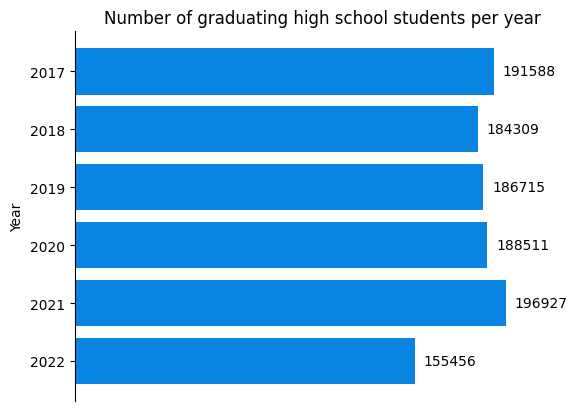

In [158]:
# Count the number of occurrences for each year, sort by index
year_counts = df_ukr_graduated_showed[~df_ukr_graduated_showed.year.isin([2016, 2023])]['year'].value_counts().sort_index(ascending=False)
sns.set_palette(['#0984e3'])

# Creating the horizontal bar chart
fig, ax = plt.subplots()
bars = ax.barh(year_counts.index.astype(str), year_counts.values)

# Adding the count outside each bar
for bar in bars:
    width = bar.get_width()
    # Place the text slightly to the right of the bar end
    ax.text(width + max(year_counts.values) * 0.02,  # Adjust this offset to control the gap
            bar.get_y() + bar.get_height()/2, 
            f'{int(width)}', 
            va='center', 
            ha='left', 
            color='black')

# Enable the vertical axis (left spine) and y-axis ticks and labels
ax.spines['left'].set_visible(True)
ax.yaxis.set_visible(True)

# Keep the horizontal axis (bottom spine) and other spines invisible
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)

# Expand the right limit of x-axis to ensure text fits inside the plot
ax.set_xlim(0, max(year_counts.values) * 1.15)

# Setting labels and title
ax.set_ylabel('Year')
ax.set_title('Number of graduating high school students per year')

# Show the plot
plt.show()

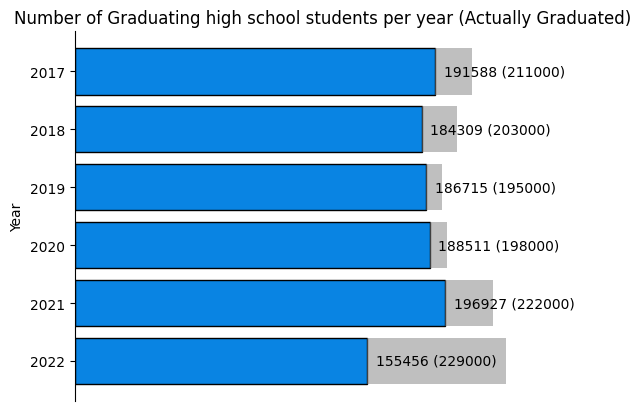

In [159]:
sns.reset_orig()
plt.rcdefaults()
max_values = {2017: 211000, 2018: 203000, 2019: 195000, 2020: 198000, 2021:222000, 2022:229000}

year_counts = df_ukr_graduated_showed[~df_ukr_graduated_showed.year.isin([2016, 2023])]['year'].value_counts().sort_index(ascending=False)
#sns.set_palette(['#ffd32a','#0984e3'])

# Convert year_counts to a list for easier manipulation
actual_values = list(year_counts)

# Create lists for years and maximum values based on the year_counts index
max_vals = [max_values.get(year, 0) for year in year_counts.index]

# Creating the horizontal bar chart
fig, ax = plt.subplots()
bars = ax.barh(year_counts.index.astype(str), year_counts.values, color='#0984e3', edgecolor='black')

# Plot maximum values as a secondary element (choose one: line or bars)
max_bars = ax.barh(year_counts.index.astype(str), max_vals-year_counts.values, left=year_counts.values, color='grey', alpha=0.5)

# Adding the count outside each bar
for bar, max_val in zip(bars, max_vals):
    width = bar.get_width()
    # Place the text slightly to the right of the bar end
    ax.text(width + max(max_vals + actual_values) * 0.02,  # Adjust this offset to control the gap
            bar.get_y() + bar.get_height()/2, 
            f'{int(width)} ({max_val})',  # Display both actual and maximum values
            va='center', 
            ha='left', 
            color='black')

# Enable the vertical axis (left spine) and y-axis ticks and labels
ax.spines['left'].set_visible(True)
ax.yaxis.set_visible(True)

# Keep the horizontal axis (bottom spine) and other spines invisible
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)

# Adjust x-axis limit to ensure text fits inside the plot
max_value = max(max_vals + actual_values)
ax.set_xlim(0, max_value * 1.15)

# Setting labels and title
ax.set_ylabel('Year')
ax.set_title('Number of Graduating high school students per year (Actually Graduated)')

# Show the plot
plt.show()

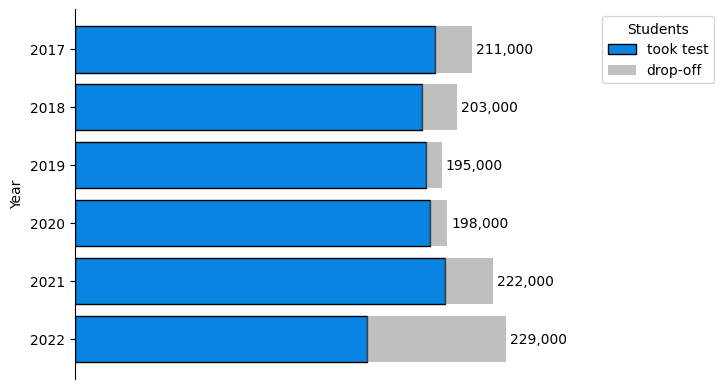

In [160]:
sns.reset_orig()
plt.rcdefaults()
max_values = {2017: 211000, 2018: 203000, 2019: 195000, 2020: 198000, 2021:222000, 2022:229000}

year_counts = df_ukr_graduated_showed[~df_ukr_graduated_showed.year.isin([2016, 2023])]['year'].value_counts().sort_index(ascending=False)
#sns.set_palette(['#ffd32a','#0984e3'])

# Convert year_counts to a list for easier manipulation
actual_values = list(year_counts)

# Create lists for years and maximum values based on the year_counts index
max_vals = [max_values.get(year, 0) for year in year_counts.index]

# Creating the horizontal bar chart
fig, ax = plt.subplots()
bars = ax.barh(year_counts.index.astype(str), year_counts.values, color='#0984e3', edgecolor='black', label='took test')

# Plot maximum values as a secondary element (choose one: line or bars)
max_bars = ax.barh(year_counts.index.astype(str), max_vals-year_counts.values, left=year_counts.values, color='grey', alpha=0.5, label='drop-off')

# Adding the count outside each bar
for bar, max_val in zip(bars, max_vals):
    width = bar.get_width()
    # Place the text slightly to the right of the bar end
    ax.text(max_val* 1.01,  # Adjust this offset to control the gap
            bar.get_y() + bar.get_height()/2, 
            f'{max_val:,}',  # Display both actual and maximum values
            va='center', 
            ha='left', 
            color='black')


# Enable the vertical axis (left spine) and y-axis ticks and labels
ax.spines['left'].set_visible(True)
ax.yaxis.set_visible(True)

# Keep the horizontal axis (bottom spine) and other spines invisible
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)

# Adjust x-axis limit to ensure text fits inside the plot
max_value = max(max_vals + actual_values)
ax.set_xlim(0, max_value * 1.15)

# Setting labels and title
ax.set_ylabel('Year')
# ax.set_title('Number of Graduating high school students per year (Actually Graduated)')
plt.legend(title='Students', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()

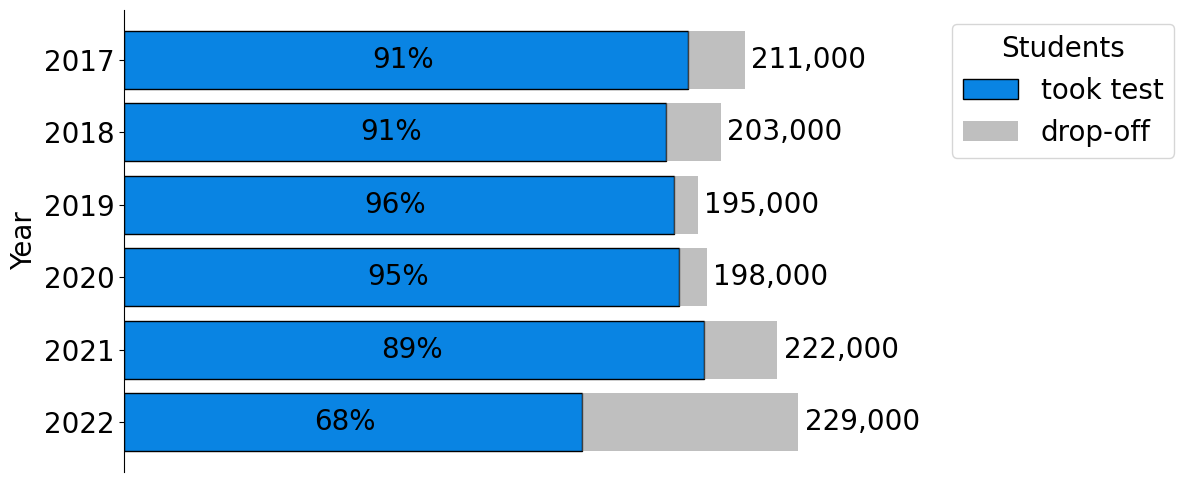

In [161]:

max_values = {2017: 211000, 2018: 203000, 2019: 195000, 2020: 198000, 2021: 222000, 2022: 229000}

# Assuming df_ukr_graduated_showed has a 'year' column
year_counts = df_ukr_graduated_showed[~df_ukr_graduated_showed.year.isin([2016, 2023])]['year'].value_counts().sort_index(ascending=False)

# Convert year_counts to a list for easier manipulation
actual_values = list(year_counts)

# Create lists for years and maximum values based on the year_counts index
max_vals = [max_values.get(year, 0) for year in year_counts.index]

# Creating the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(year_counts.index.astype(str), year_counts.values, color='#0984e3', edgecolor='black', label='took test')

# Plot maximum values as a secondary element
max_bars = ax.barh(year_counts.index.astype(str), max_vals-year_counts.values, left=year_counts.values, color='grey', alpha=0.5, label='drop-off')

# Adding the count and percentage inside each bar
for bar, actual, max_val in zip(bars, year_counts.values, max_vals):
    percentage = (actual / max_val) * 100 if max_val != 0 else 0  # Avoid division by zero
    ax.text(bar.get_width()/2*1.1, bar.get_y() + bar.get_height() / 2,
            f'{percentage:.0f}%',  # Display actual number and percentage
            va='center', ha='right', color='black', fontsize=20)
    ax.text(max_val* 1.01,  # Adjust this offset to control the gap
            bar.get_y() + bar.get_height()/2, 
            f'{max_val:,}',  # Display both actual and maximum values
            va='center', 
            ha='left', 
            color='black',fontsize=20)

# # Adding the count outside each bar
# for bar, max_val in zip(bars, max_vals):
#     width = bar.get_width()
#     # Place the text slightly to the right of the bar end
#     ax.text(max_val* 1.01,  # Adjust this offset to control the gap
#             bar.get_y() + bar.get_height()/2, 
#             f'{max_val:,}',  # Display both actual and maximum values
#             va='center', 
#             ha='left', 
#             color='black')
    
# Enable the vertical axis (left spine) and y-axis ticks and labels
ax.spines['left'].set_visible(True)
ax.yaxis.set_visible(True)

# Keep the horizontal axis (bottom spine) and other spines invisible
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)

# Adjust x-axis limit to ensure text fits inside the plot
max_value = max(max_vals)
ax.set_xlim(0, max_value * 1.15)
ax.tick_params(axis='y', labelsize=20)
# Setting labels and title
ax.set_ylabel('Year', fontsize=20)
plt.legend(title='Students', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20, title_fontsize=20)

# Show the plot
plt.show()


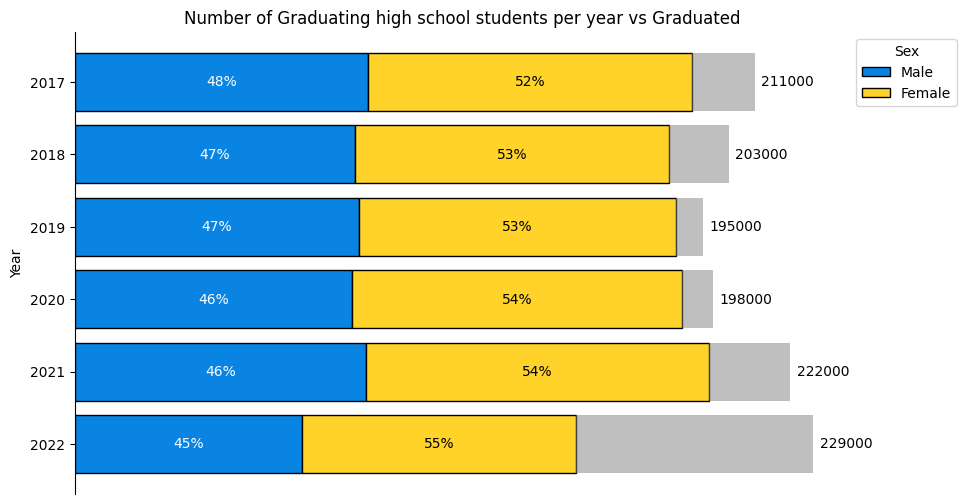

In [162]:
# Resetting the original Seaborn style
sns.reset_orig()
plt.rcdefaults()

# Assuming df_ukr_graduated_showed has a 'gender' column with values 'male' and 'female'
# Aggregate data by year and gender
gender_year_counts = df_ukr_graduated_showed[df_ukr_graduated_showed.year.isin([2017, 2018, 2019, 2020, 2021, 2022])] \
    .groupby(['year', 'sextypename']).size().unstack(fill_value=0).sort_index(ascending=False)

male_counts = gender_year_counts['Male']
female_counts = gender_year_counts['Female']

# Max values for reference as given
max_values = {2017: 211000, 2018: 203000, 2019: 195000, 2020: 198000, 2021: 222000, 2022: 229000}
max_vals = [max_values[year] for year in gender_year_counts.index]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars_male = ax.barh(gender_year_counts.index.astype(str), gender_year_counts['Male'], color='#0984e3', edgecolor='black')
sns.reset_orig()
plt.rcdefaults()
bars_female = ax.barh(gender_year_counts.index.astype(str), gender_year_counts['Female'], left=gender_year_counts['Male'], color='#ffd32a', edgecolor='black')

# Adding max values bar for reference
ax.barh(gender_year_counts.index.astype(str), max_vals-(gender_year_counts['Male']+ gender_year_counts['Female']), left=gender_year_counts['Male']+ gender_year_counts['Female'], color='grey', alpha=0.5)

# Removing the frame except for the left spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)  # Hides the x-axis

# Adding the count outside each bar
for i, (year, row) in enumerate(gender_year_counts.iterrows()):
    total = row['Male'] + row['Female']
    percentage_male = (row['Male'] / total * 100) if total > 0 else 0
    percentage_female = (row['Female'] / total * 100) if total > 0 else 0
    ax.text(row['Male'] / 2, i, f'{percentage_male:.0f}%', va='center', ha='center', color='white')
    ax.text(row['Male'] + row['Female'] / 2, i, f'{percentage_female:.0f}%', va='center', ha='center', color='black')

    # Also, update the text on the right to include max values if needed
    ax.text(max_values[year]*1.01, i, f'{max_values[year]}', va='center', ha='left', color='black')

# Labels and title
ax.set_xlabel('Number of Graduates')
ax.set_ylabel('Year')
ax.set_title('Number of Graduating high school students per year vs Graduated')
plt.legend(title='Sex', bbox_to_anchor=(1, 1), labels=['Male', 'Female'])
# Show the plot
plt.show()

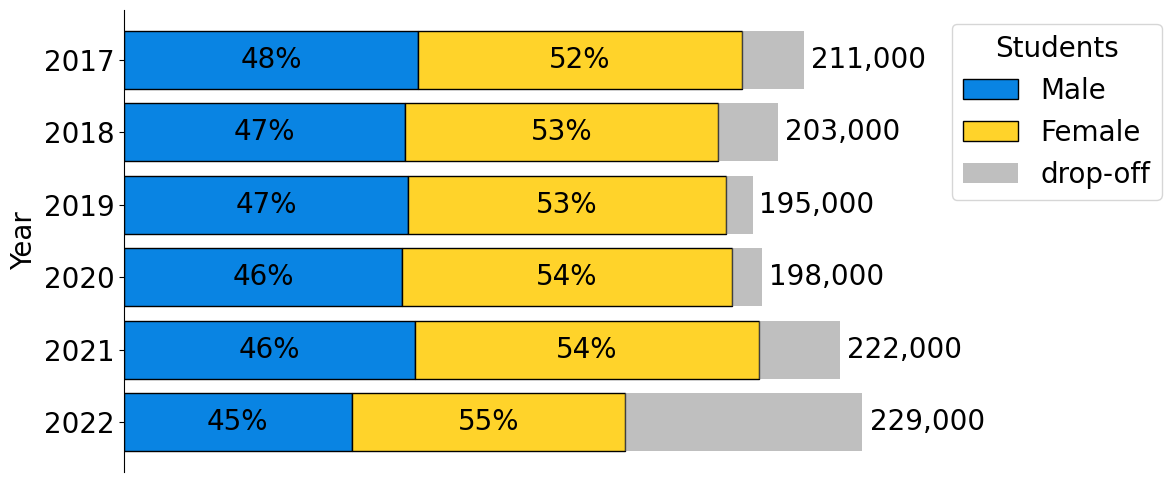

In [163]:
import matplotlib.pyplot as plt
import pandas as pd

# Resetting to default styles
plt.rcdefaults()

# Assuming df_ukr_graduated_showed has a 'gender' column with values 'male' and 'female'
# Aggregate data by year and gender
gender_year_counts = df_ukr_graduated_showed[df_ukr_graduated_showed.year.isin([2017, 2018, 2019, 2020, 2021, 2022])] \
    .groupby(['year', 'sextypename']).size().unstack(fill_value=0).sort_index(ascending=False)

male_counts = gender_year_counts['Male']
female_counts = gender_year_counts['Female']

# Max values for reference as given
max_values = {2017: 211000, 2018: 203000, 2019: 195000, 2020: 198000, 2021: 222000, 2022: 229000}
max_vals = [max_values[year] for year in gender_year_counts.index]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars_male = ax.barh(gender_year_counts.index.astype(str), gender_year_counts['Male'], color='#0984e3', label='Male', edgecolor='black')
bars_female = ax.barh(gender_year_counts.index.astype(str), gender_year_counts['Female'], left=gender_year_counts['Male'], color='#ffd32a', label='Female', edgecolor='black')
bars_dropoff = ax.barh(gender_year_counts.index.astype(str), max_vals - (gender_year_counts['Male'] + gender_year_counts['Female']), left=gender_year_counts['Male'] + gender_year_counts['Female'], color='grey', alpha=0.5, label='drop-off')

# Removing the frame except for the left spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)  # Hides the x-axis

# Adding the count outside each bar
for i, (year, row) in enumerate(gender_year_counts.iterrows()):
    total = row['Male'] + row['Female']
    percentage_male = (row['Male'] / total * 100) if total > 0 else 0
    percentage_female = (row['Female'] / total * 100) if total > 0 else 0
    ax.text(row['Male'] / 2, i, f'{percentage_male:.0f}%', va='center', ha='center', color='black', fontsize=20)
    ax.text(row['Male'] + row['Female'] / 2, i, f'{percentage_female:.0f}%', va='center', ha='center', color='black', fontsize=20)
    ax.text(max_values[year]*1.01, i, f'{max_values[year]:,}', va='center', ha='left', color='black', fontsize=20)

# Labels and title
ax.set_xlabel('Number of Graduates')
ax.set_ylabel('Year', fontsize=20)
ax.tick_params(axis='y', labelsize=20)
# ax.set_title('Number of Graduating high school students per year (Actually Graduated)')

# Adjusting the legend to include all components
plt.legend(title='Students', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20, title_fontsize=20)

# Show the plot
plt.show()


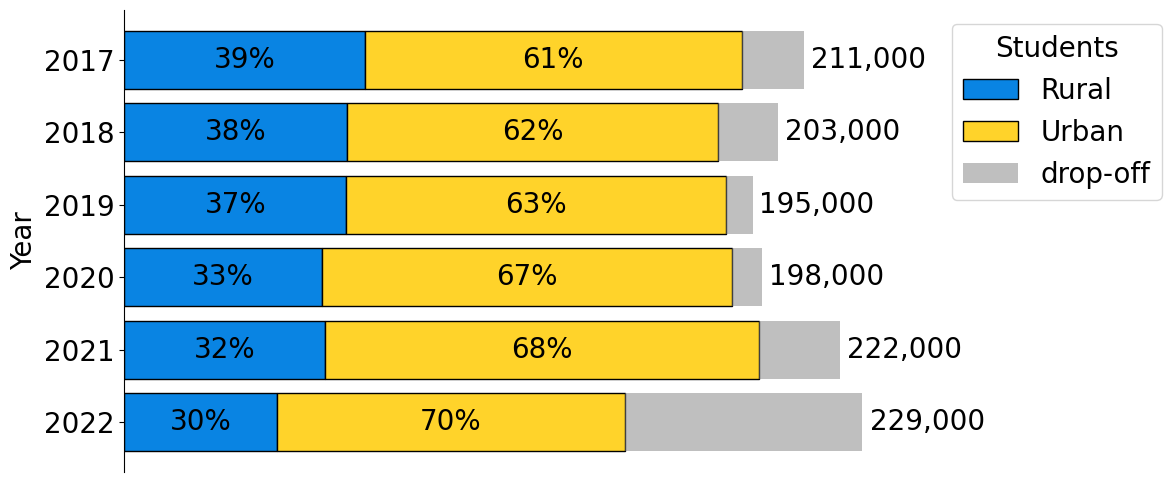

In [164]:
# Resetting to default styles
plt.rcdefaults()

# Assuming df_ukr_graduated_showed has a 'gender' column with values 'male' and 'female'
# Aggregate data by year and gender
gender_year_counts = df_ukr_graduated_showed[df_ukr_graduated_showed.year.isin([2017, 2018, 2019, 2020, 2021, 2022])] \
    .groupby(['year', 'location_type']).size().unstack(fill_value=0).sort_index(ascending=False)

male_counts = gender_year_counts['Rural']
female_counts = gender_year_counts['Urban']

# Max values for reference as given
max_values = {2017: 211000, 2018: 203000, 2019: 195000, 2020: 198000, 2021: 222000, 2022: 229000}
max_vals = [max_values[year] for year in gender_year_counts.index]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars_male = ax.barh(gender_year_counts.index.astype(str), gender_year_counts['Rural'], color='#0984e3', label='Rural', edgecolor='black')
bars_female = ax.barh(gender_year_counts.index.astype(str), gender_year_counts['Urban'], left=gender_year_counts['Rural'], color='#ffd32a', label='Urban', edgecolor='black')
bars_dropoff = ax.barh(gender_year_counts.index.astype(str), max_vals - (gender_year_counts['Rural'] + gender_year_counts['Urban']), left=gender_year_counts['Rural'] + gender_year_counts['Urban'], color='grey', alpha=0.5, label='drop-off')

# Removing the frame except for the left spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)  # Hides the x-axis

# Adding the count outside each bar
for i, (year, row) in enumerate(gender_year_counts.iterrows()):
    total = row['Rural'] + row['Urban']
    percentage_male = (row['Rural'] / total * 100) if total > 0 else 0
    percentage_female = (row['Urban'] / total * 100) if total > 0 else 0
    ax.text(row['Rural'] / 2, i, f'{percentage_male:.0f}%', va='center', ha='center', color='black', fontsize=20)
    ax.text(row['Rural'] + row['Urban'] / 2, i, f'{percentage_female:.0f}%', va='center', ha='center', color='black', fontsize=20)
    ax.text(max_values[year]*1.01, i, f'{max_values[year]:,}', va='center', ha='left', color='black', fontsize=20)

# Labels and title
ax.set_xlabel('Number of Graduates')
ax.set_ylabel('Year', fontsize=20)
ax.tick_params(axis='y', labelsize=20)
# ax.set_title('Number of Graduating high school students per year (Actually Graduated)')

# Adjusting the legend to include all components
plt.legend(title='Students', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20, title_fontsize=20)

# Show the plot
plt.show()


/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/1789480767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_df['count'] = 1


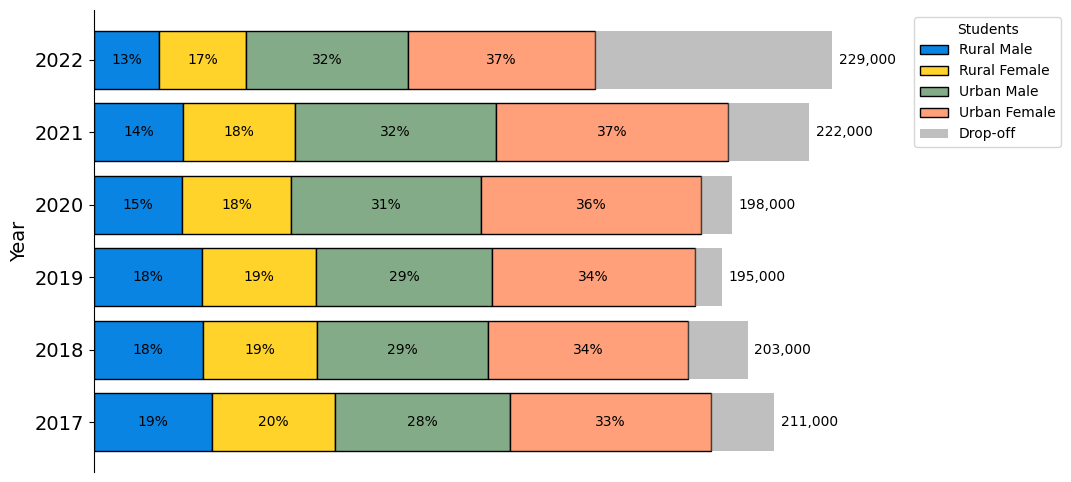

In [165]:
# Resetting to default styles
plt.rcdefaults()

our_df = df_ukr_graduated_showed[df_ukr_graduated_showed.year.isin([2017, 2018, 2019, 2020, 2021, 2022])]
our_df['count'] = 1
pivot_df = our_df.pivot_table(
    index='year',
    columns=['location_type', 'sextypename'],
    values='count',
    aggfunc='sum',
    fill_value=0  # Fill missing values with 0
)

# Flatten the column index
pivot_df.columns = [f'{loc}_{sex}' for loc, sex in pivot_df.columns]

urban_female_counts = pivot_df['Urban_Female']
urban_male_counts = pivot_df['Urban_Male']
rural_female_counts = pivot_df['Rural_Female']
rural_male_counts = pivot_df['Rural_Male']

# Max values for reference as given
max_values = {2017: 211000, 2018: 203000, 2019: 195000, 2020: 198000, 2021: 222000, 2022: 229000}
max_vals = [max_values[year] for year in pivot_df.index]

# Creating labels for the y-axis
labels = pivot_df.index.astype(str)

fig, ax = plt.subplots(figsize=(10, 6))

bars_rural_male = ax.barh(labels, rural_male_counts, color='#0984e3', label='Rural Male', edgecolor='black')
bars_rural_female = ax.barh(labels, rural_female_counts, left=rural_male_counts, color='#ffd32a', label='Rural Female', edgecolor='black')
bars_urban_male = ax.barh(labels, urban_male_counts, left=rural_male_counts + rural_female_counts, color='#84ab87', label='Urban Male', edgecolor='black')
bars_urban_female = ax.barh(labels, urban_female_counts, left=rural_male_counts + rural_female_counts + urban_male_counts, color='#ffa07a', label='Urban Female', edgecolor='black')
bars_dropoff = ax.barh(labels, max_vals - (rural_male_counts + rural_female_counts + urban_male_counts + urban_female_counts), left=rural_male_counts + rural_female_counts + urban_male_counts + urban_female_counts, color='grey', alpha=0.5, label='Drop-off')

# Removing the frame except for the left spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)  # Hides the x-axis

# Adding the count outside each bar
for i, (year, row) in enumerate(pivot_df.iterrows()):
    total = row['Urban_Female'] + row['Urban_Male'] + row['Rural_Female'] + row['Rural_Male']
    percentage_urban_female = (row['Urban_Female'] / total * 100) if total > 0 else 0
    percentage_urban_male = (row['Urban_Male'] / total * 100) if total > 0 else 0
    percentage_rural_female = (row['Rural_Female'] / total * 100) if total > 0 else 0
    percentage_rural_male = (row['Rural_Male'] / total * 100) if total > 0 else 0
    # ax.text(row['Rural'] / 2, i, f'{percentage_male:.0f}%', va='center', ha='center', color='black', fontsize=20)
    ax.text(row['Rural_Male'] / 2, i, f'{percentage_rural_male:.0f}%', va='center', ha='center', color='black', fontsize=10)
    ax.text(row['Rural_Male'] + row['Rural_Female'] / 2, i, f'{percentage_rural_female:.0f}%', va='center', ha='center', color='black', fontsize=10)
    ax.text(row['Rural_Male'] + row['Rural_Female']  + row['Urban_Male'] / 2, i, f'{percentage_urban_male:.0f}%', va='center', ha='center', color='black', fontsize=10)
    ax.text(row['Rural_Male'] + row['Rural_Female']  + row['Urban_Male'] + row['Urban_Female'] / 2, i, f'{percentage_urban_female:.0f}%', va='center', ha='center', color='black', fontsize=10)
    ax.text(max_values.get(year, 0) * 1.01, i, f'{max_values.get(year, 0):,}', va='center', ha='left', color='black', fontsize=10)

# Labels and title
ax.set_xlabel('Number of Graduates')
ax.set_ylabel('Year', fontsize=14)

ax.tick_params(axis='y', labelsize=14)

# Adjusting the legend to include all components
plt.legend(title='Students', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=10)

# Show the plot
plt.show()


/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/3900675288.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_df['count'] = 1


37.24590881020997
36.54704535183088
36.230776983836485
33.806068071660015
33.58598874715831
32.577718855043116


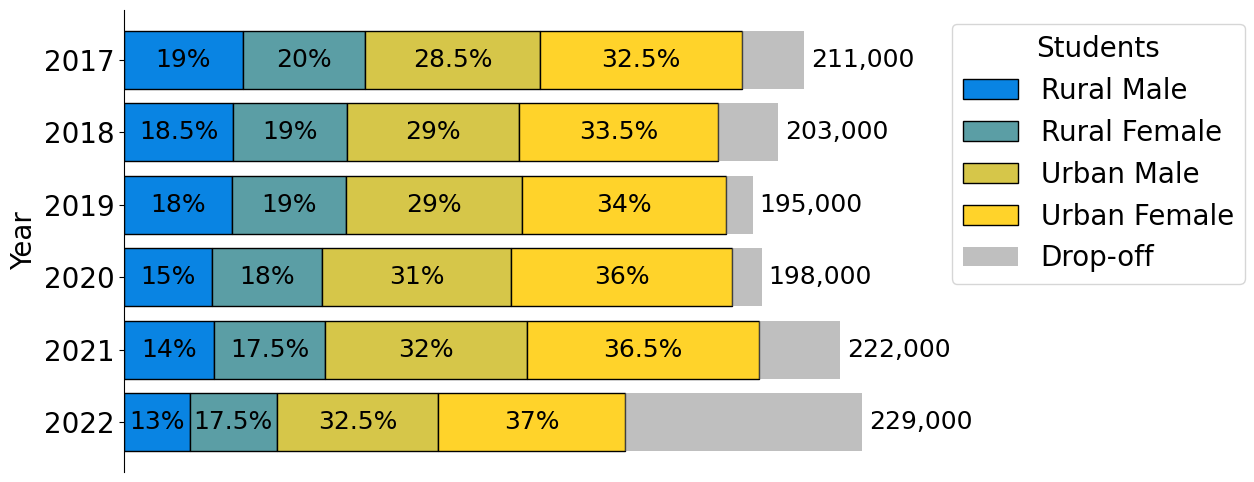

In [166]:
import matplotlib.pyplot as plt
import pandas as pd

# Resetting to default styles
plt.rcdefaults()

# Filter the dataframe for the relevant years and add a count column
our_df = df_ukr_graduated_showed[df_ukr_graduated_showed.year.isin([2017, 2018, 2019, 2020, 2021, 2022])]
our_df['count'] = 1

# Pivot the dataframe to get the counts per year, location type, and gender
pivot_df = our_df.pivot_table(
    index='year',
    columns=['location_type', 'sextypename'],
    values='count',
    aggfunc='sum',
    fill_value=0  # Fill missing values with 0
)

# Flatten the column index
pivot_df.columns = [f'{loc}_{sex}' for loc, sex in pivot_df.columns]

# Extract the counts for each category
urban_female_counts = pivot_df['Urban_Female'][::-1]
urban_male_counts = pivot_df['Urban_Male'][::-1]
rural_female_counts = pivot_df['Rural_Female'][::-1]
rural_male_counts = pivot_df['Rural_Male'][::-1]

# Max values for reference as given
max_values = {2017: 211000, 2018: 203000, 2019: 195000, 2020: 198000, 2021: 222000, 2022: 229000}
max_vals = [max_values[year] for year in pivot_df.index[::-1]]

# Creating labels for the y-axis
labels = pivot_df.index.astype(str)[::-1]

fig, ax = plt.subplots(figsize=(10, 6))

bars_rural_male = ax.barh(labels, rural_male_counts, color='#0984e3', label='Rural Male', edgecolor='black')
bars_rural_female = ax.barh(labels, rural_female_counts, left=rural_male_counts, color='#5b9ea5', label='Rural Female', edgecolor='black')
bars_urban_male = ax.barh(labels, urban_male_counts, left=rural_male_counts + rural_female_counts, color='#d6c649', label='Urban Male', edgecolor='black')
bars_urban_female = ax.barh(labels, urban_female_counts, left=rural_male_counts + rural_female_counts + urban_male_counts, color='#ffd32a', label='Urban Female', edgecolor='black')
bars_dropoff = ax.barh(labels, max_vals - (rural_male_counts + rural_female_counts + urban_male_counts + urban_female_counts), left=rural_male_counts + rural_female_counts + urban_male_counts + urban_female_counts, color='grey', alpha=0.5, label='Drop-off')

# Removing the frame except for the left spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)  # Hides the x-axis

def round_05(numb):
    numb = round(numb*2)/2
    return int(numb) if numb == int(numb) else (15 if numb ==14.5 else numb)
# Adding the count outside each bar
for i, (year, row) in enumerate(pivot_df[::-1].iterrows()):
    total = row['Urban_Female'] + row['Urban_Male'] + row['Rural_Female'] + row['Rural_Male']
    percentage_urban_female = (row['Urban_Female'] / total * 100) if total > 0 else 0
    print(percentage_urban_female)
    percentage_urban_male = (row['Urban_Male'] / total * 100) if total > 0 else 0
    percentage_rural_female = (row['Rural_Female'] / total * 100) if total > 0 else 0
    percentage_rural_male = (row['Rural_Male'] / total * 100) if total > 0 else 0
    ax.text(row['Rural_Male'] / 2, i, f'{round_05(percentage_rural_male)}%', va='center', ha='center', color='black', fontsize=18)
    ax.text(row['Rural_Male'] + row['Rural_Female'] / 2, i, f'{round_05(percentage_rural_female)}%', va='center', ha='center', color='black', fontsize=18)
    ax.text(row['Rural_Male'] + row['Rural_Female']  + row['Urban_Male'] / 2, i, f'{round_05(percentage_urban_male)}%', va='center', ha='center', color='black', fontsize=18)
    ax.text(row['Rural_Male'] + row['Rural_Female']  + row['Urban_Male'] + row['Urban_Female'] / 2, i, f'{round_05(percentage_urban_female)}%', va='center', ha='center', color='black', fontsize=18)
    ax.text(max_values.get(year, 0) * 1.01, i, f'{max_values.get(year, 0):,}', va='center', ha='left', color='black', fontsize=18)

# Labels and title
ax.set_xlabel('Number of Graduates')
ax.set_ylabel('Year', fontsize=20)
ax.tick_params(axis='y', labelsize=20)

# Adjusting the legend to include all components
plt.legend(title='Students', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20, title_fontsize=20)

# Show the plot
plt.show()


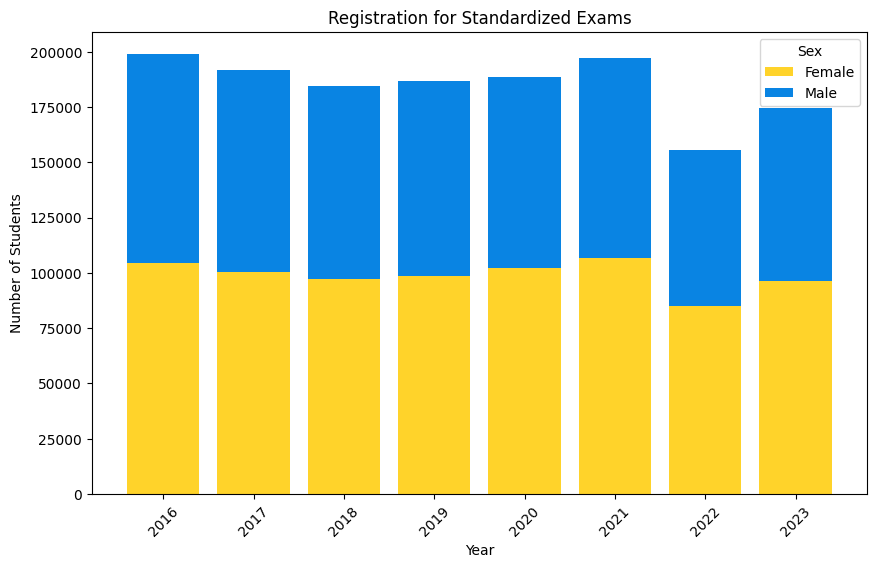

In [167]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_ukr_graduated_showed.groupby(['year', 'sextypename']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for sextype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[sextype], bottom=bottom_pos, label=sextype)
    bottom_pos += df_pivot[sextype]

plt.title('Registration for Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sex')

plt.show()

In [168]:
df_ukr_graduated_showed['test_status_numeric'] = df_ukr_graduated_showed['test_status'].apply(lambda x: 1 if x == 'Accepted' else 0)


/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_50895/2695156428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated_showed['test_status_numeric'] = df_ukr_graduated_showed['test_status'].apply(lambda x: 1 if x == 'Accepted' else 0)


In [169]:
pd.pivot_table(df_ukr_graduated_showed, index='region_name_test_center', columns=['year'], values='test_status_numeric', aggfunc='mean')

year,2016,2017,2018,2019,2020,2021,2022,2023
region_name_test_center,,,,,,,,
Austia,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998536
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
Canada,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
Cherkaska,0.934315,0.940340,0.941846,0.929846,0.947067,0.942587,0.999165,0.998625
Chernihivska,0.906223,0.929329,0.926509,0.914738,0.924065,0.932461,0.999496,0.998658
Chernivetska,0.763613,0.774138,0.786412,0.824644,0.918912,0.923373,1.000000,0.998323
Croatia,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000


In [170]:
df_ukr_graduated_showed.year.value_counts()

year
2016    199000
2021    196927
2017    191588
2020    188511
2019    186715
2018    184309
2023    174735
2022    155456
Name: count, dtype: int64

In [171]:
df_ukr_graduated_showed[['sextypename', 'year']].value_counts()

sextypename  year
Female       2021    106538
             2016    104382
             2020    102312
             2017    100442
             2019     98525
             2018     97273
             2023     96143
Male         2016     94618
             2017     91146
             2021     90389
             2019     88190
             2018     87036
             2020     86199
Female       2022     84871
Male         2023     78592
             2022     70585
Name: count, dtype: int64

In [172]:
grouped_df = df_ukr_graduated_showed.groupby(['year', 'sextypename']).size().unstack(fill_value=0)
grouped_df['difference'] = grouped_df['Female'] - grouped_df['Male']
grouped_df['difference']

year
2016     9764
2017     9296
2018    10237
2019    10335
2020    16113
2021    16149
2022    14286
2023    17551
Name: difference, dtype: int64

In [173]:
pivot = pd.pivot_table(df_ukr_graduated_showed, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                    
year           2016    2017   2018   2019    2020    2021   2022   2023
sextypename                                                            
Female       104382  100442  97273  98525  102312  106538  84871  96143
Male          94618   91146  87036  88190   86199   90389  70585  78592

In [174]:
pivot = pd.pivot_table(df_ukr_graduated_showed[df_ukr_graduated_showed['location_type'] != 'Abroad'], index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                        
year             2016    2017    2018    2019    2020    2021    2022    2023
location_type                                                                
Rural           88986   74828   69189   69004   61353   62392   47324   56824
Urban          110014  116760  115120  117711  127158  134535  108132  117851

In [175]:
df_ukr_graduated_showed_score = df_ukr_graduated_showed[df_ukr_graduated_showed.test_status != 'Not selected 100-200']

In [176]:
pivot = pd.pivot_table(df_ukr_graduated_showed, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                          \
year                      2016      2017      2018      2019      2020   
test_status                                                              
Accepted              179625.0  176540.0  168969.0  170901.0  177368.0   
Canceled                  95.0     134.0      69.0      92.0      19.0   
Failed                 19280.0   14914.0   15271.0   15722.0   11124.0   
Not selected 100-200       NaN       NaN       NaN       NaN       NaN   

                                                    
year                      2021      2022      2023  
test_status                                         
Accepted              185770.0  155382.0  174544.0  
Canceled                  39.0      27.0      52.0  
Failed                 10559.0      47.0     139.0  
Not selected 100-200     559.0       NaN       NaN

In [177]:
total_pivot = [len(df_ukr_graduated_showed[df_ukr_graduated_showed['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Failure rate for graduating students (Ukrainian test)')
pivot.div(total_pivot).round(4)

Failure rate for graduating students (Ukrainian test)


outid                                                  \
year                    2016    2017    2018    2019    2020    2021    2022   
test_status                                                                    
Accepted              0.9026  0.9215  0.9168  0.9153  0.9409  0.9433  0.9995   
Canceled              0.0005  0.0007  0.0004  0.0005  0.0001  0.0002  0.0002   
Failed                0.0969  0.0778  0.0829  0.0842  0.0590  0.0536  0.0003   
Not selected 100-200     NaN     NaN     NaN     NaN     NaN  0.0028     NaN   

                              
year                    2023  
test_status                   
Accepted              0.9989  
Canceled              0.0003  
Failed                0.0008  
Not selected 100-200     NaN

In [178]:
df_ukr_graduated_2022[(df_ukr_graduated_2022.displaced==1)&(df_ukr_graduated_2022.region_name.isin(['Donetska', 'Luhanska', 'Zaporizka', 'Mykolaivska', 'Sumska', 'Kharkivska', 'Khersonska', 'Chernihivska']))].shape[0]/df_ukr_graduated_2022[df_ukr_graduated_2022.displaced==1].shape[0]

0.5229330197193884

In [179]:
df_ukr_graduated_2022.displacement_type.value_counts()

displacement_type
Non-displaced           129764
Displaced_abroad         23261
Displaced_internally     13302
Name: count, dtype: int64

In [180]:
df_ukr_graduated_2022.sextypename.value_counts(normalize=True)

sextypename
Female    0.543099
Male      0.456901
Name: proportion, dtype: float64

In [181]:
df_ukr_graduated_2022[(df_ukr_graduated_2022.displaced==1)].sextypename.value_counts(normalize=True)

sextypename
Female    0.522359
Male      0.477641
Name: proportion, dtype: float64

In [182]:
df_ukr_graduated_2022.category.value_counts(normalize=True)

category
city                   0.350502
districts in cities    0.339903
village                0.211920
urban village          0.094861
settlement             0.002814
Name: proportion, dtype: float64

In [183]:
df_ukr_graduated_2022[(df_ukr_graduated_2022.displaced==1)].category.value_counts(normalize=True)

category
districts in cities    0.507590
city                   0.332850
village                0.083965
urban village          0.071110
settlement             0.004485
Name: proportion, dtype: float64

In [184]:
df_ukr_graduated_2022[(df_ukr_graduated_2022.displacement_type=='Displaced_abroad')].category.value_counts(normalize=True)

category
districts in cities    0.590903
city                   0.280169
village                0.071794
urban village          0.054985
settlement             0.002150
Name: proportion, dtype: float64

In [185]:
df_ukr_graduated_2022[(df_ukr_graduated_2022.displacement_type=='Displaced_abroad')].region_name_test_center.value_counts()

region_name_test_center
Poland                      7132
Germany                     6247
Czechia                     1924
Italy                        817
Austia                       724
France                       642
United Kingdom               637
Slovakia                     521
Spain                        520
Bulgaria                     467
Lithuania                    422
Netherlands                  415
Belgium                      340
Ireland                      296
Estonia                      259
Latvia                       211
Sweden                       208
Romania                      208
Denmark                      196
Moldova                      181
Hungary                      163
Portugal                     154
Switzerland                  117
Croatia                      105
Finland                       75
United States of America      72
Georgia                       56
Turkey                        53
Canada                        32
Greece             

In [186]:
df_ukr_graduated_2022_frontline = df_ukr_graduated_2022[(df_ukr_graduated_2022.displaced==1)&(df_ukr_graduated_2022.region_name.isin(['Donetska', 'Luhanska', 'Zaporizka', 'Mykolaivska', 'Sumska', 'Kharkivska', 'Khersonska', 'Chernihivska']))]

In [187]:
pivot = pd.pivot_table(df_ukr_graduated_2022_frontline, index = ['displacement_type'], columns = ['region_name'], values=['outid'], aggfunc='count')
pd.set_option('display.max_columns', None)
pivot

outid                                          \
region_name          Chernihivska Donetska Kharkivska Khersonska Luhanska   
displacement_type                                                           
Displaced_abroad              487     1428       3389        510      317   
Displaced_internally          118     3992       2212       1403     1006   

                                                   
region_name          Mykolaivska Sumska Zaporizka  
displacement_type                                  
Displaced_abroad             942    542      1190  
Displaced_internally         731    172       681

In [188]:
total_pivot = [len(df_ukr_graduated_2022_frontline[df_ukr_graduated_2022_frontline['region_name']==region].outid.unique()) for region in sorted(df_ukr_graduated_2022_frontline.region_name.unique())]
pd.set_option('display.max_columns', None)
pivot.div(total_pivot).round(2)

outid                                          \
region_name          Chernihivska Donetska Kharkivska Khersonska Luhanska   
displacement_type                                                           
Displaced_abroad              0.8     0.26       0.61       0.27     0.24   
Displaced_internally          0.2     0.74       0.39       0.73     0.76   

                                                   
region_name          Mykolaivska Sumska Zaporizka  
displacement_type                                  
Displaced_abroad            0.56   0.76      0.64  
Displaced_internally        0.44   0.24      0.36

In [189]:
df_ukr_graduated_2022_frontline.region_name_test_center.value_counts(normalize=True)

region_name_test_center
Dnipropetrovska             0.149582
Poland                      0.142050
Germany                     0.130335
Kyiv                        0.057165
Poltavska                   0.046077
Czechia                     0.039958
Lvivska                     0.039749
Odeska                      0.033368
Vinnytska                   0.021234
Kyivska                     0.020502
Ivano-Frankivska            0.019979
Cherkaska                   0.019927
Khmelnytska                 0.019822
Kirovohradska               0.018410
Zakarpatska                 0.017155
Italy                       0.013546
Chernivetska                0.013128
France                      0.012918
Zaporizka                   0.012082
Ternopilska                 0.012082
Lithuania                   0.011349
Slovakia                    0.010774
Bulgaria                    0.010460
Austia                      0.010094
Rivnenska                   0.009100
Spain                       0.008839
Netherlands   

# Math 

In [190]:
df_math_graduated = df_graduated_tests[df_graduated_tests.test_subject == 'mathtest']
sum(df_math_graduated.duplicated())

0

In [191]:
df_math_graduated_showed = df_math_graduated[~df_math_graduated.test_status.isin(['Absent', 'Not selected 100-200'])]
df_math_graduated_showed.test_status.value_counts()

test_status
Accepted    869309
Failed      105945
Canceled       381
Name: count, dtype: int64

In [192]:
pivot = pd.pivot_table(df_math_graduated_showed, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                    
year          2016   2017   2018   2019   2020    2021    2022    2023
test_status                                                           
Accepted     84928  77757  75032  86819  98095  122972  155299  168407
Canceled        76     41     47     33     20      85      27      52
Failed       12347  12753  13263  10859   9930   40387     130    6276

In [193]:
total_pivot = [len(df_math_graduated_showed[df_math_graduated_showed['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Failure rate for graduating students (Math)')
pivot.div(total_pivot).round(3)


Failure rate for graduating students (Math)


outid                                                 
year          2016   2017   2018   2019   2020   2021   2022   2023
test_status                                                        
Accepted     0.872  0.859  0.849  0.889  0.908  0.752  0.999  0.964
Canceled     0.001  0.000  0.001  0.000  0.000  0.001  0.000  0.000
Failed       0.127  0.141  0.150  0.111  0.092  0.247  0.001  0.036